> # Import Libraries

In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats   # Q-Q plot for checking Data Normalization
from scipy import stats       # Test for checking Data Normalization
from scipy.stats import anderson, kstest, shapiro   # Test for checking Data Normalization
from sklearn.preprocessing import LabelEncoder    # convert object and category variables
from sklearn.model_selection import train_test_split # Spliting
from sklearn.preprocessing import RobustScaler # Normalization
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Scores for ML Models

> # 1. Load dataset

In [560]:
Data = pd.read_csv("Stroke Dataset.csv")
Data

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,ever_married,work_type,Residence_type,stroke
0,9046,Male,67.0,0,1,228.69,36.6,formerly smoked,Yes,Private,Urban,1
1,51676,Female,61.0,0,0,202.21,NaN,never smoked,Yes,Self-employed,Rural,1
2,31112,Male,80.0,0,1,105.92,32.5,never smoked,Yes,Private,Rural,1
3,60182,Female,49.0,0,0,171.23,34.4,smokes,Yes,Private,Urban,1
4,1665,Female,79.0,1,0,174.12,24.0,never smoked,Yes,Self-employed,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,83.75,NaN,never smoked,Yes,Private,Urban,0
5106,44873,Female,81.0,0,0,125.20,40.0,never smoked,Yes,Self-employed,Urban,0
5107,19723,Female,35.0,0,0,82.99,30.6,never smoked,Yes,Self-employed,Rural,0
5108,37544,Male,51.0,0,0,166.29,25.6,formerly smoked,Yes,Private,Rural,0


> # 2. Information about dataset

> ## 2-1. Columns titles

In [561]:
Data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'avg_glucose_level', 'bmi', 'smoking_status', 'ever_married',
       'work_type', 'Residence_type', 'stroke'],
      dtype='object')

> ## 2-2. Total information about dataset

In [562]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                4909 non-null   float64
 7   smoking_status     5110 non-null   object 
 8   ever_married       5110 non-null   object 
 9   work_type          5110 non-null   object 
 10  Residence_type     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


> ## 2-3. Details of dataset (transpose)

In [563]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


> ## 2-4. Checking value in each categorical or object column

In [564]:
col = ["gender", "hypertension", "heart_disease", "smoking_status", 
       "ever_married", "work_type", "Residence_type", "stroke"]

for i in col:
    print(f"============Values in {i}============\n{Data[i].value_counts()}\n")

============Values in gender============
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

============Values in hypertension============
hypertension
0    4612
1     498
Name: count, dtype: int64

============Values in heart_disease============
heart_disease
0    4834
1     276
Name: count, dtype: int64

============Values in smoking_status============
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

============Values in ever_married============
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

============Values in work_type============
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

============Values in Residence_type============
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

============Values in stroke============
stroke
0    486

> ## 2-5. Histrogram of dataset

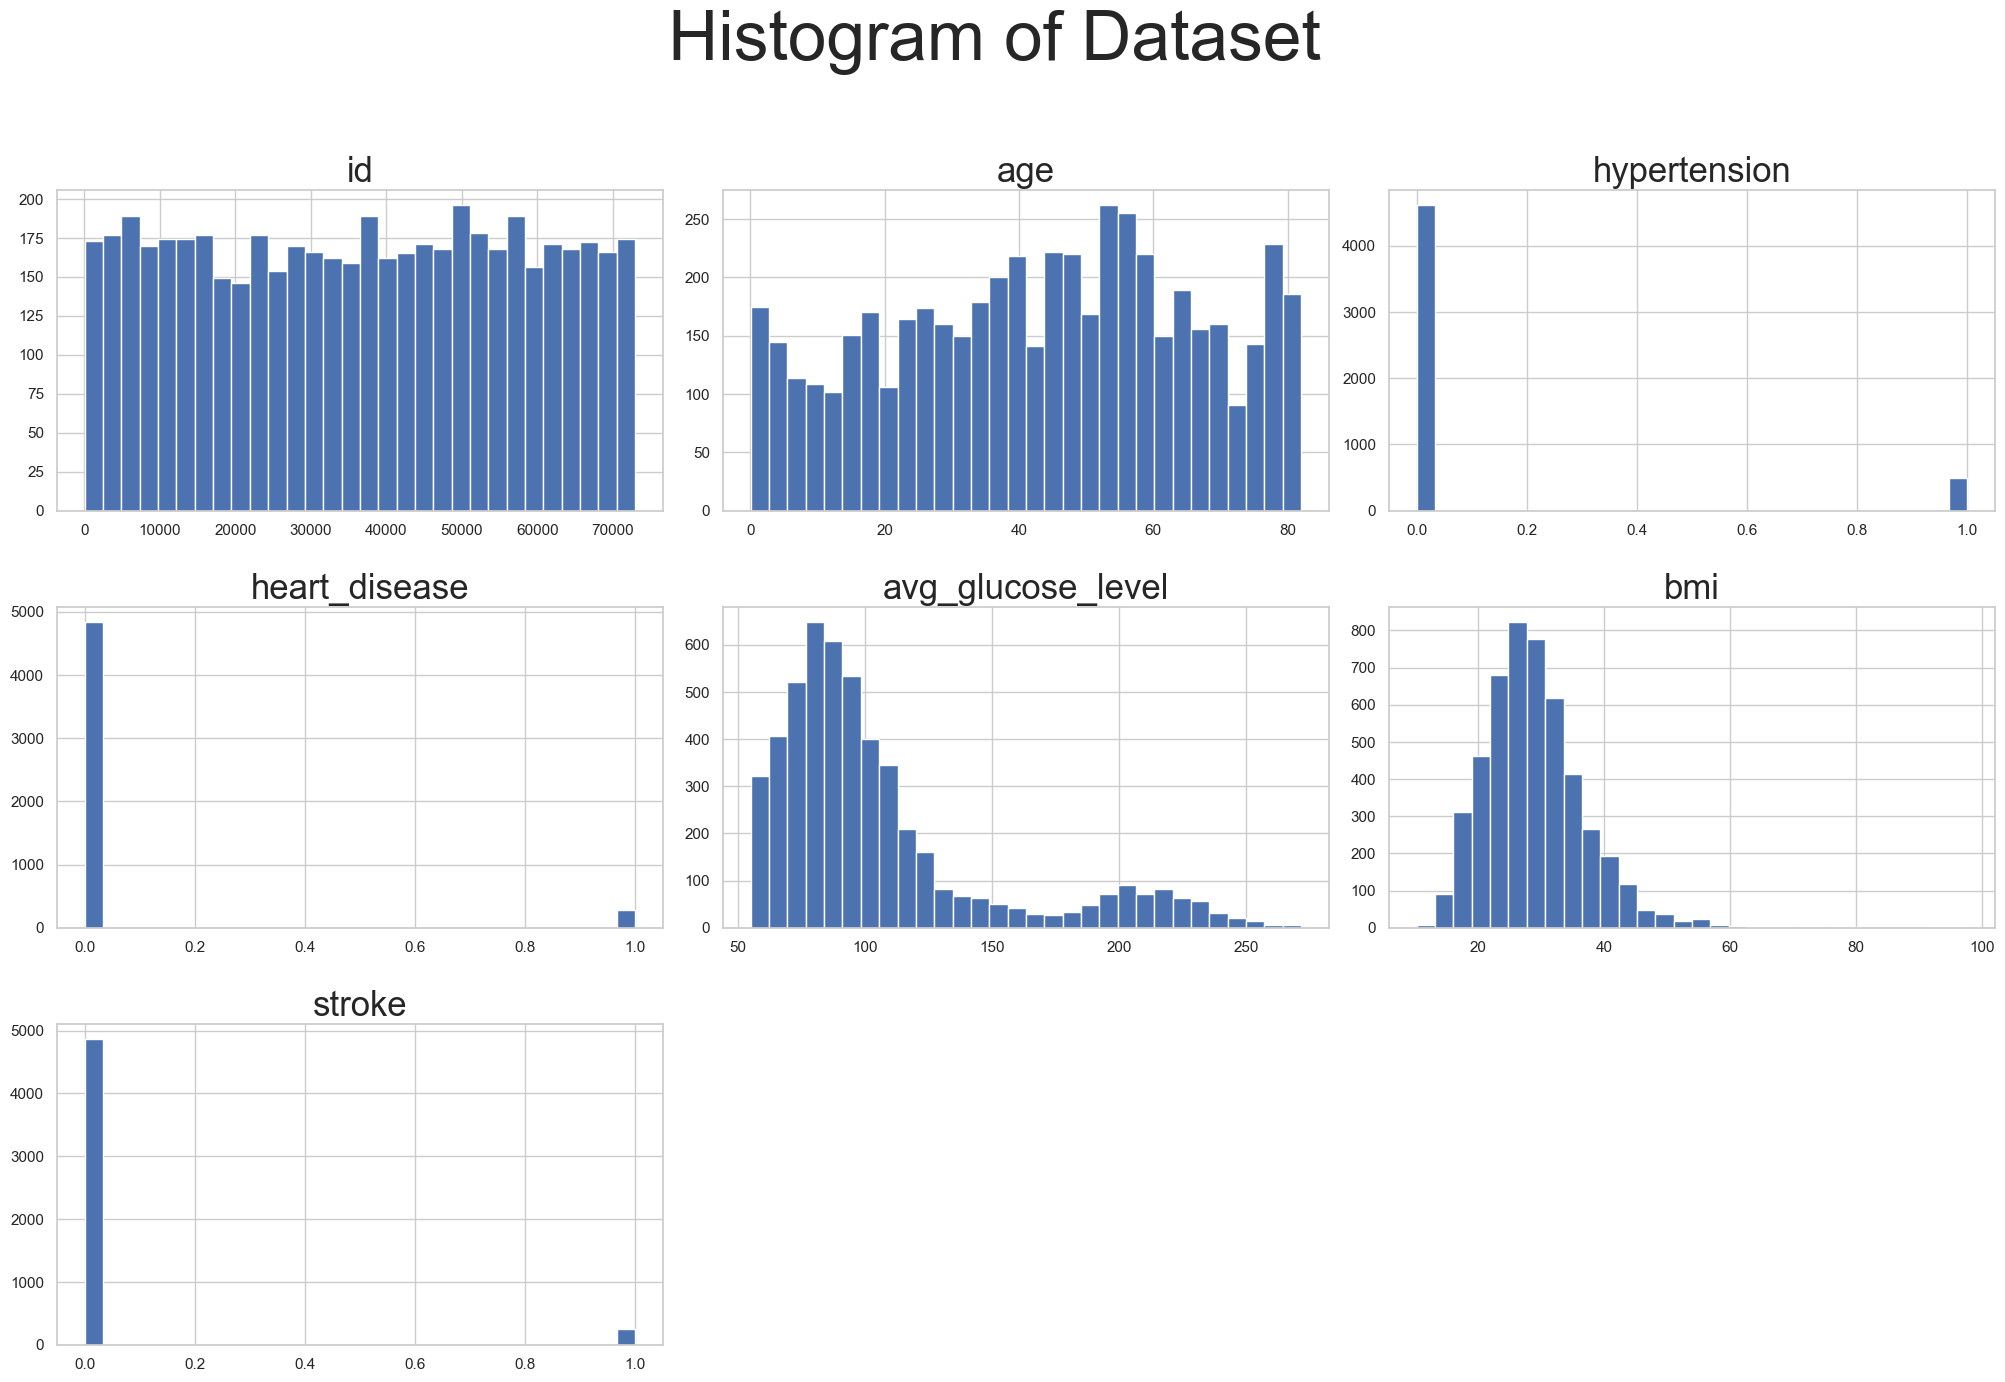

In [565]:
fig = Data.hist(figsize = (25, 15), bins = 30, edgecolor = "white")

# Add grid and title
plt.grid(axis = "x", alpha = 1)
plt.suptitle("Histogram of Dataset", fontsize = 50, y = 1)

plt.subplots_adjust(wspace = 0.1)  # Adjust the width space between subplots

# Set font size for axes labels and titles
for ax in fig.flatten():
    ax.set_xlabel(ax.get_xlabel())
    ax.set_ylabel(ax.get_ylabel())
    ax.set_title(ax.get_title(), fontsize = 25)

plt.show()

> ## 2-6. Null Values

In [566]:
Data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
ever_married           0
work_type              0
Residence_type         0
stroke                 0
dtype: int64

> ## 2-6-1. Checking null values

In [567]:
Data.isnull()

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,ever_married,work_type,Residence_type,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,True,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


> ## 2-6-2. Chart Of Nulls

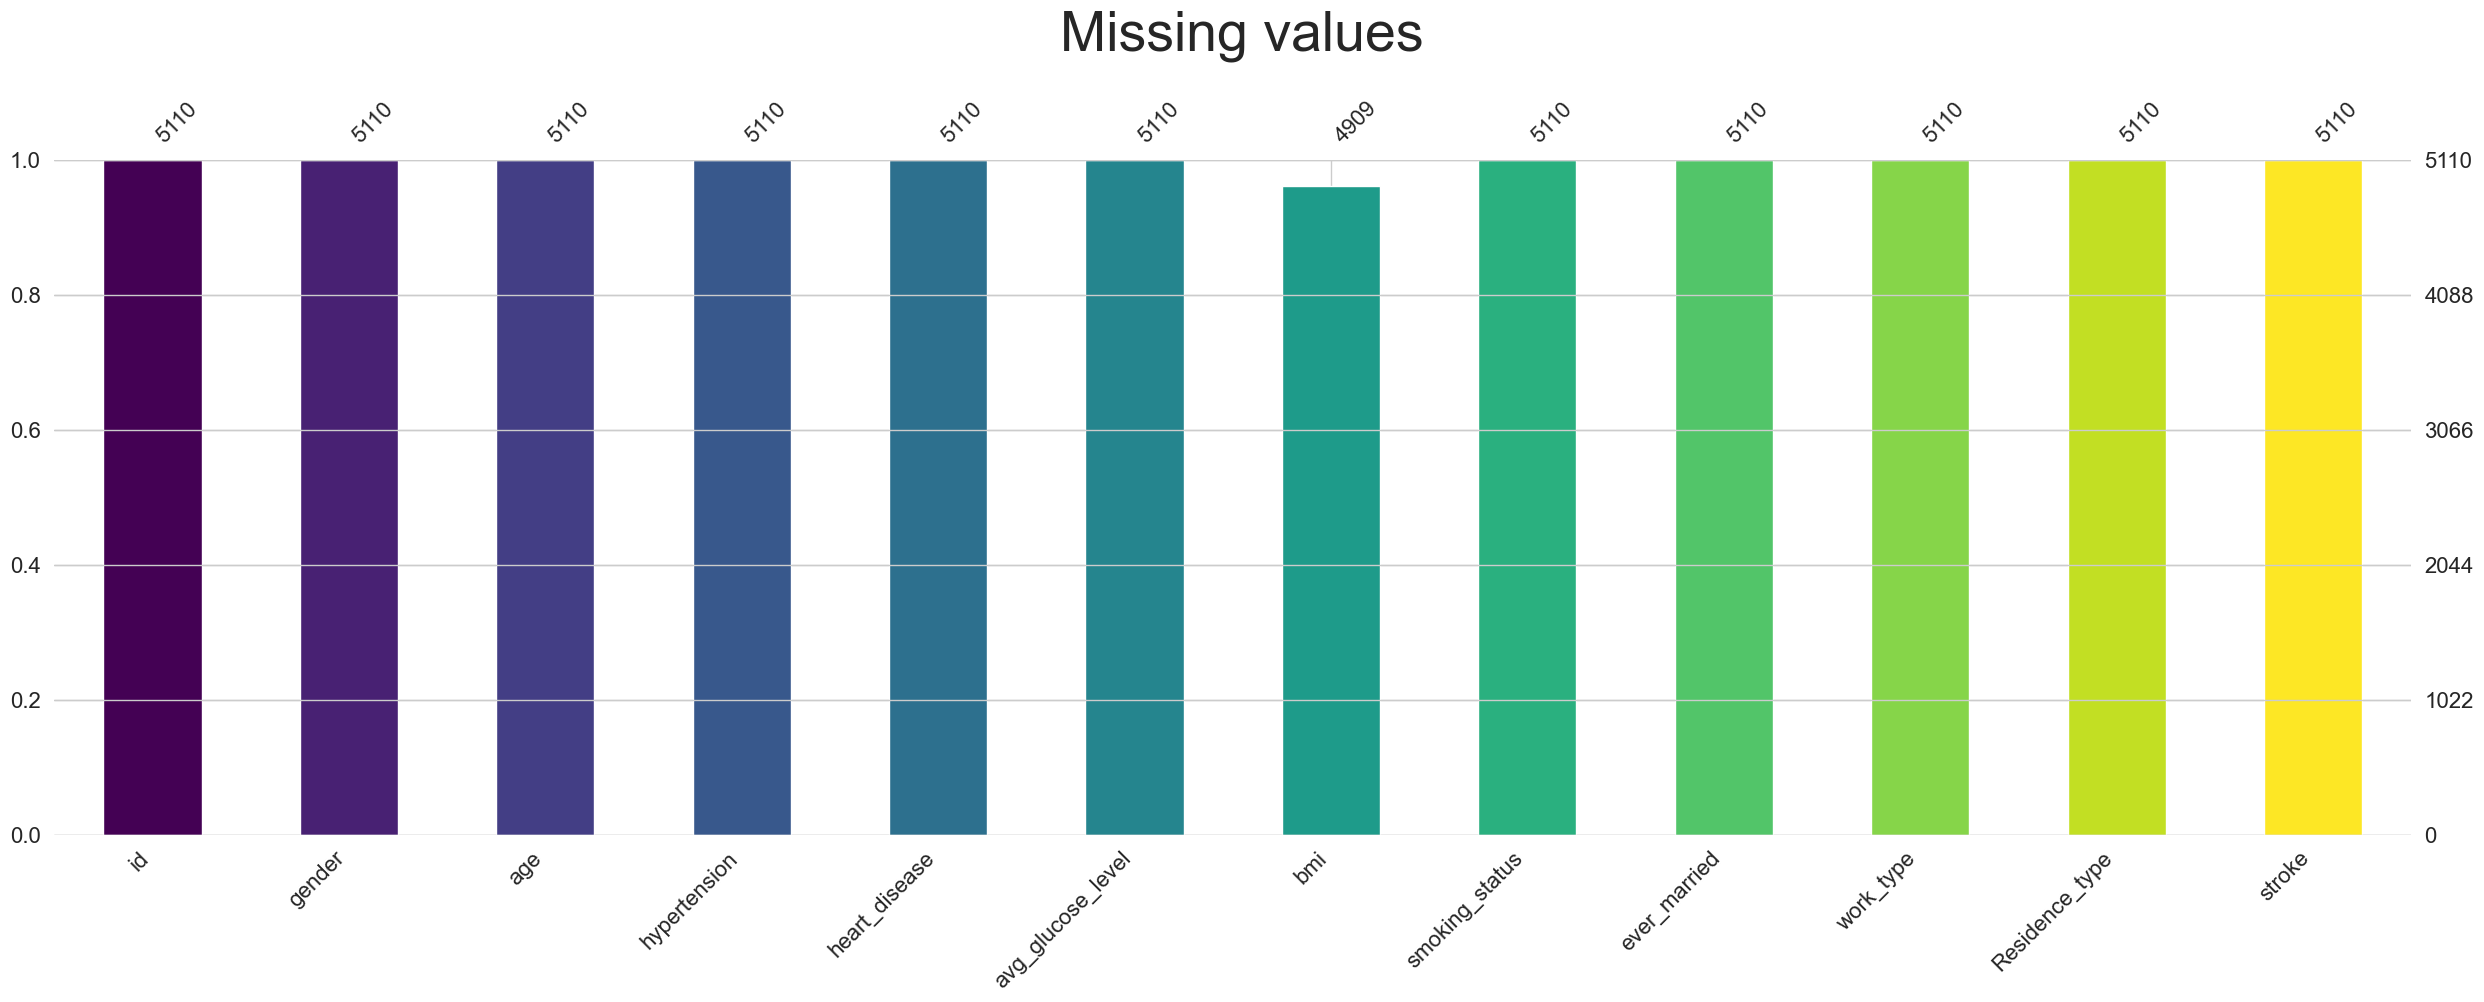

In [568]:
num_columns = len(Data.columns)
colors = plt.cm.viridis(np.linspace(0, 1, num_columns)) 
msno.bar(Data, color = colors)
plt.suptitle("Missing values", fontsize = 40, y = 1)
plt.tight_layout()
plt.show()

> # 3. Cleaning

> ## 3-1. Delete and Replace unnecessary data

In [569]:
Data.drop(columns = ["id"], inplace = True)   # Unnecessary
Data["gender"] = Data["gender"].replace("Other", "Male")    # Replace 1 Other value with Male

> ## 3-2. Filling null values

In [570]:
for col in Data.columns:
    if Data[col].dtype == "int64" or Data[col].dtype == "float64":
        Data[col] = Data[col].fillna(Data[col].median())    # Data contains outliers, so we use median
    if Data[col].dtype == "object":
        Data[col] = Data[col].fillna("UNKNOWN")

In [571]:
Data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
ever_married         0
work_type            0
Residence_type       0
stroke               0
dtype: int64

> ## 3-3. Create category columns for "Age", "AVG_Glucose_Level", "BMI"

In [572]:
# Age
Data["age_group"] = pd.cut(Data["age"], bins = [0, 13, 18, 45, 60, 10000], 
                           labels = ["Children", "Teen", "Adult", "MidAge", "Elderly"], right = True)

# AVG_Glucose
Data["glucose_group"] = pd.cut(Data["avg_glucose_level"], bins = [0, 70, 99, 125, 180, 10000], 
                               labels = ["Low", "Normal", "Pre-diabetes", "Diabetes", "High-risk"], right = True)

#BMI
Data["bmi_group"] = pd.cut(Data["bmi"], bins = [0, 18.5, 25, 30, 10000], 
                               labels = ["Under weight", "Normal weight", "Over weight", "Obesity weight"], right = True)

> # 4. EDA

> ## 4-1. Analyze all the data of dataset

> ## 4-1-1. Pie Chart for Stroke Status

Status of Strokes are:

Healthy = 4861
Stroke = 249


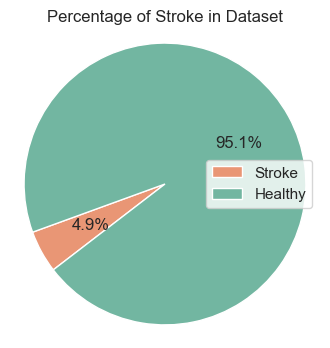

In [573]:
Strokes_counts = Data["stroke"].value_counts()
no_stroke_count = Strokes_counts.get(0, 0)
stroke_count = Strokes_counts.get(1, 0)

print("Status of Strokes are:") 
print(f"\nHealthy = {no_stroke_count}")
print(f"Stroke = {stroke_count}")

# Prepare data for plotting
Percentage_data = [stroke_count, no_stroke_count]
labels = ["Stroke", "Healthy"]

plt.figure(figsize = (4, 4))
plt.pie(Percentage_data, colors = ["#e99675", "#72b6a1" ], autopct = "%1.1f%%", startangle = 200)
plt.title("Percentage of Stroke in Dataset")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(labels = labels)  # Use the same labels for the legend
plt.show()

> ## 4-1-2. Compaire Stroke status with Heart Disease, Hypertension, Smoking Status, BMI Groups and Glucose Groups

> ## 4-1-2-1. Stroke status with Heart disease

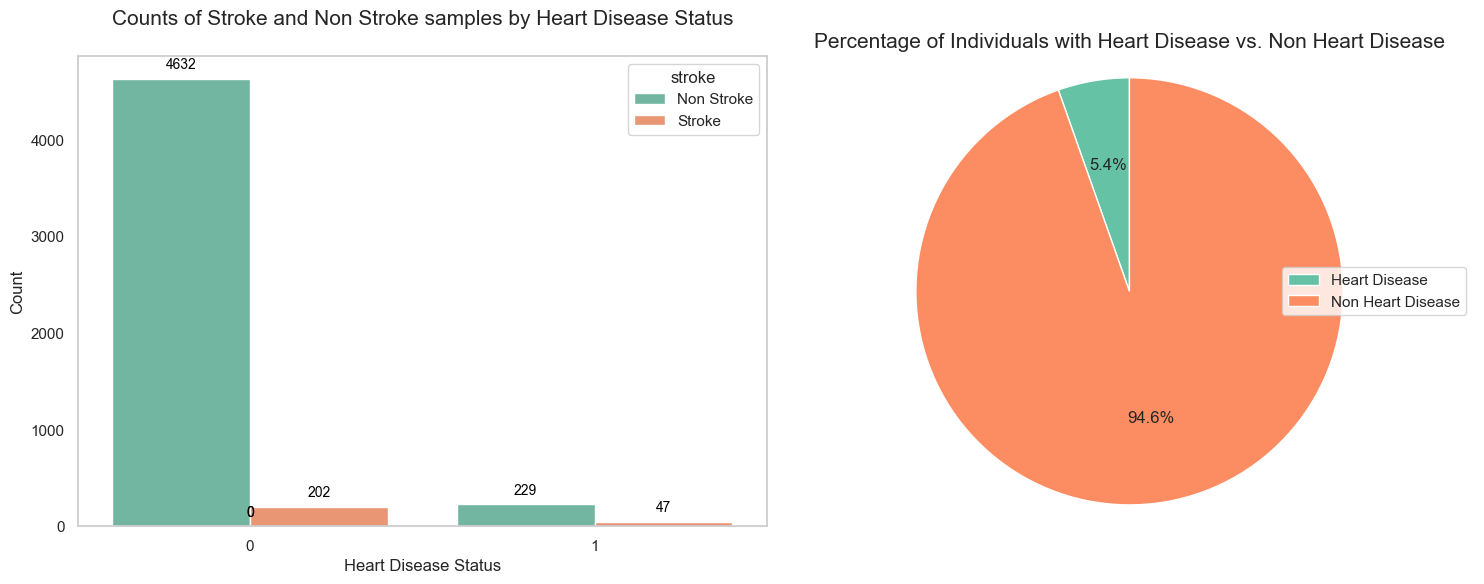

In [574]:
# Group by heart disease and stroke status, then count occurrences
strokeHEART_count = Data.groupby(["heart_disease", "stroke"], observed = True).size().unstack(fill_value = 0)
heart_count = strokeHEART_count.reset_index()

# Melt the DataFrame for easier plotting with seaborn
meltedHEART_Count = heart_count.melt(id_vars = "heart_disease", value_vars = [0, 1], 
                                  var_name = "stroke", value_name = "count")
meltedHEART_Count["stroke"] = meltedHEART_Count["stroke"].map({0: "Non Stroke", 1: "Stroke"})

#---------------------------------------------

Heart_Ds_counts = Data["heart_disease"].value_counts()

no_Heart_D_count = Heart_Ds_counts.get(0, 0)
Heart_D_count = Heart_Ds_counts.get(1, 0)


# Prepare data for plotting
Percentage_data = [Heart_D_count, no_Heart_D_count]
labels = ["Heart Disease", "Non Heart Disease"]

#-----------------------------------------------

# Create subplots for the bar plot and pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
sns.set(style = "whitegrid")

# Create the bar plot
sns.barplot(data = meltedHEART_Count, x = "heart_disease", y = "count", hue = "stroke",
            palette="Set2",  ax = ax1)

# Set titles and labels for the bar plot
ax1.set_title("Counts of Stroke and Non Stroke samples by Heart Disease Status", fontsize = 15, y = 1.05)
ax1.set_xlabel("Heart Disease Status")
ax1.set_ylabel("Count")
ax1.grid(axis = "y")

# Annotate counts on the stroke bar plot
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_height())}", 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = "center", va = "bottom", 
                  fontsize = 10, color = "black", 
                  xytext = (0, 5), 
                  textcoords = "offset points")

# Create the pie chart
colors = sns.color_palette("Set2", n_colors = len(labels))
ax2.pie(Percentage_data, colors = colors, autopct = "%1.1f%%", startangle = 90)
ax2.set_title("Percentage of Individuals with Heart Disease vs. Non Heart Disease", fontsize = 15)
ax2.axis("equal")    # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels = labels,loc = "center right")    # Use the same labels for the legend

plt.tight_layout()
plt.show()

> ## 4-1-2-2. Stroke status with Hypertension

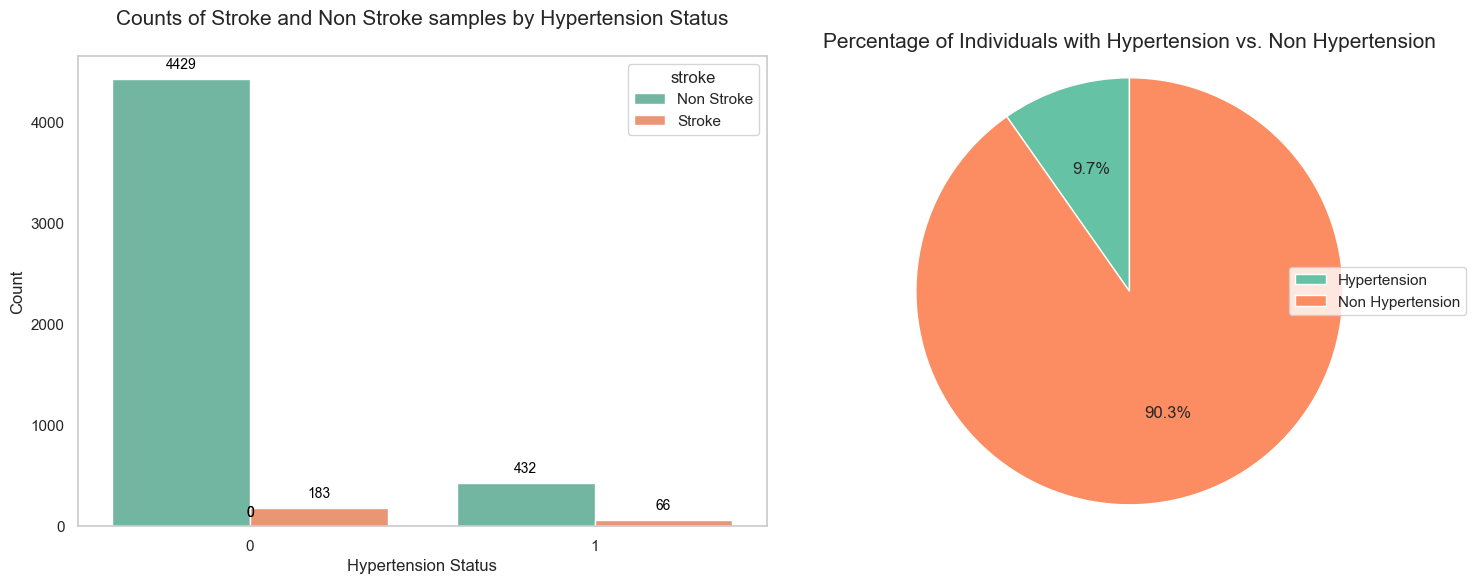

In [575]:
# Group by hypertension and stroke status, then count occurrences
strokeHYPER_count = Data.groupby(["hypertension", "stroke"], observed = True).size().unstack(fill_value = 0)
hyper_s_count = strokeHYPER_count.reset_index()

# Melt the DataFrame for easier plotting with seaborn
meltedHYPER_Count = hyper_s_count.melt(id_vars = "hypertension", value_vars = [0, 1], 
                                  var_name = "stroke", value_name = "count")
meltedHYPER_Count["stroke"] = meltedHYPER_Count["stroke"].map({0: "Non Stroke", 1: "Stroke"})

#---------------------------------------------

Hyper_counts = Data["hypertension"].value_counts()

no_hyper_count = Hyper_counts.get(0, 0)
hyper_count = Hyper_counts.get(1, 0)


# Prepare data for plotting
Percentage_data = [hyper_count, no_hyper_count]
labels = ["Hypertension", "Non Hypertension"]

#-----------------------------------------------

# Create subplots for the bar plot and pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
sns.set(style = "whitegrid")

# Create the bar plot
sns.barplot(data = meltedHYPER_Count, x = "hypertension", y = "count", hue = "stroke",
            palette = "Set2",  ax = ax1)

# Set titles and labels for the bar plot
ax1.set_title("Counts of Stroke and Non Stroke samples by Hypertension Status", fontsize = 15, y = 1.05)
ax1.set_xlabel("Hypertension Status")
ax1.set_ylabel("Count")
ax1.grid(axis = "y")

# Annotate counts on the stroke bar plot
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_height())}", 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = "center", va = "bottom", 
                  fontsize = 10, color = "black", 
                  xytext = (0, 5), 
                  textcoords = "offset points")

# Create the pie chart
colors = sns.color_palette("Set2", n_colors = len(labels))
ax2.pie(Percentage_data, colors = colors, autopct = "%1.1f%%", startangle = 90)
ax2.set_title("Percentage of Individuals with Hypertension vs. Non Hypertension", fontsize = 15)
ax2.axis("equal")    # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels = labels,loc = "center right")    # Use the same labels for the legend

plt.tight_layout()
plt.show()

> ## 4-1-2-3. Stroke status with Smoking status

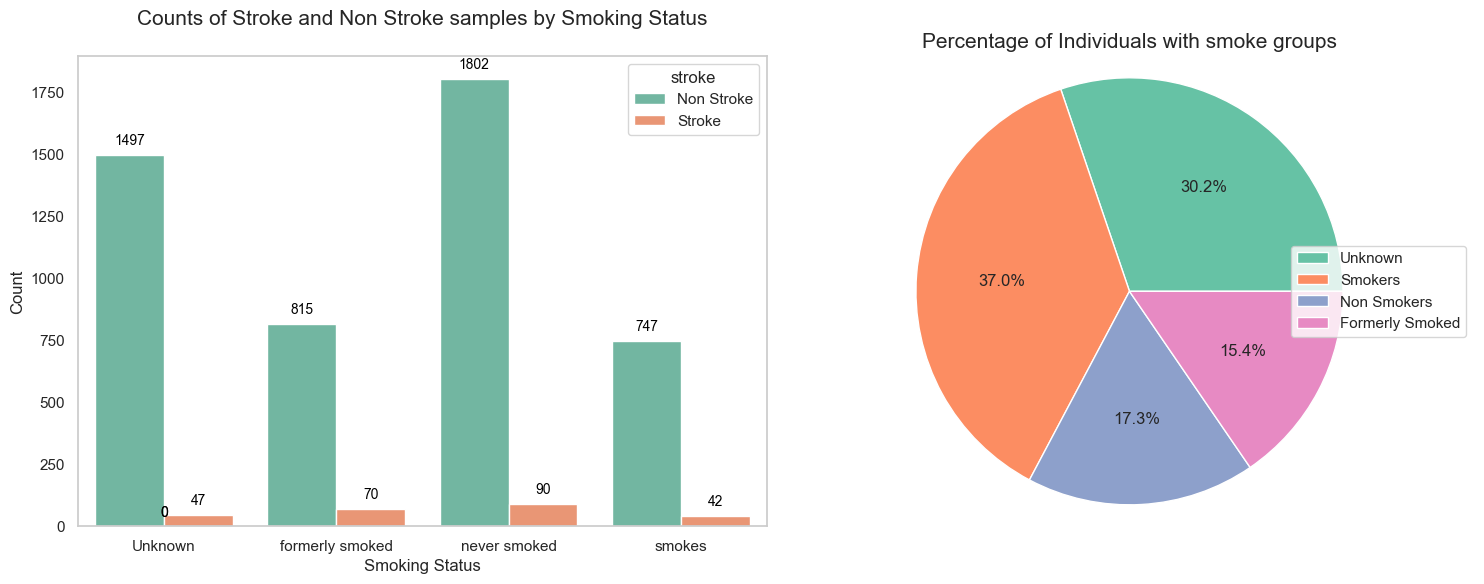

In [576]:
# Group by smoking status and stroke status, then count occurrences
strokeSMOKE_count = Data.groupby(["smoking_status", "stroke"], observed = True).size().unstack(fill_value = 0)
smoke_s_count = strokeSMOKE_count.reset_index()

# Melt the DataFrame for easier plotting with seaborn
meltedSMOKE_Count = smoke_s_count.melt(id_vars = "smoking_status", value_vars = [0, 1], 
                                        var_name = "stroke", value_name = "count")
meltedSMOKE_Count["stroke"] = meltedSMOKE_Count["stroke"].map({0: "Non Stroke", 1: "Stroke"})

# Count occurrences of smoking status
Smoke_counts = Data["smoking_status"].value_counts()

# Use the actual labels from the smoking_status column
# Adjust these labels based on your dataset
no_smoke_count = Smoke_counts.get("never smoked", 0) 
unknown_smoke_count = Smoke_counts.get("Unknown", 0) 
formerly_smoke_count = Smoke_counts.get("formerly smoked", 0) 
smoke_count = Smoke_counts.get("smokes", 0)

# Prepare data for plotting
Percentage_data = [unknown_smoke_count, no_smoke_count, formerly_smoke_count, smoke_count]
labels = ["Unknown", "Smokers", "Non Smokers", "Formerly Smoked"]

# Create subplots for the bar plot and pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
sns.set(style = "whitegrid")

# Create the bar plot
sns.barplot(data = meltedSMOKE_Count, x = "smoking_status", y = "count", hue = "stroke",
            palette = "Set2", ax = ax1)

# Set titles and labels for the bar plot
ax1.set_title("Counts of Stroke and Non Stroke samples by Smoking Status", fontsize = 15, y = 1.05)
ax1.set_xlabel("Smoking Status")
ax1.set_ylabel("Count")
ax1.grid(axis = "y")

# Annotate counts on the stroke bar plot
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_height())}", 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = "center", va = "bottom", 
                  fontsize = 10, color = "black", 
                  xytext = (0, 5), 
                  textcoords = "offset points")

# Create the pie chart
colors = sns.color_palette("Set2", n_colors = len(labels))
ax2.pie(Percentage_data, colors = colors, autopct = "%1.1f%%", startangle = 0)
ax2.set_title("Percentage of Individuals with smoke groups", fontsize = 15)
ax2.axis("equal")    # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend to the pie chart
ax2.legend(labels = labels, loc = "center right")    # Adjust position as needed

plt.tight_layout()
plt.show()

> ## 4-1-2-4. Stroke status with BMI groups

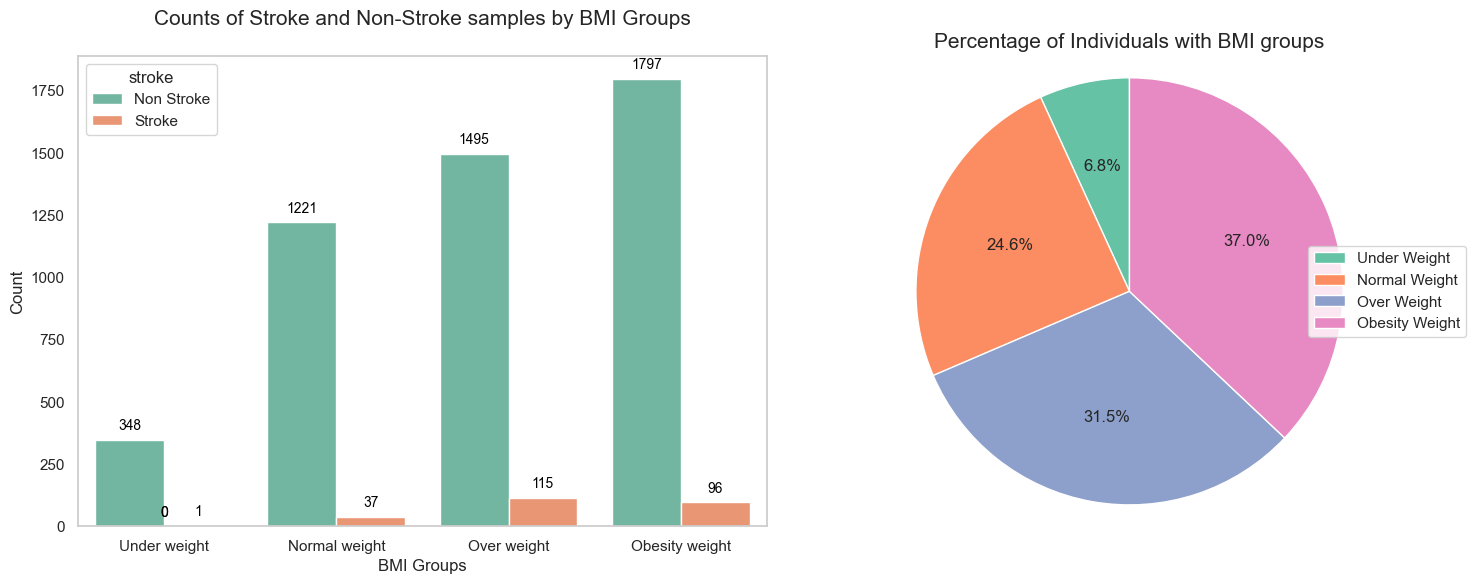

In [577]:
# Group by BMI Groups and stroke status, then count occurrences
strokeBMI_count = Data.groupby(["bmi_group", "stroke"], observed = True).size().unstack(fill_value = 0)
BMI_G_count = strokeBMI_count.reset_index()

# Melt the DataFrame for easier plotting with seaborn
meltedBMI_Count = BMI_G_count.melt(id_vars = "bmi_group", value_vars = [0, 1], 
                                     var_name = "stroke", value_name = "count")
meltedBMI_Count["stroke"] = meltedBMI_Count["stroke"].map({0: "Non Stroke", 1: "Stroke"})

# Count occurrences of BMI groups
BMI_counts = Data["bmi_group"].value_counts()

# Use the actual labels from the BMI Groups column
under_w_count = BMI_counts.get("Under weight", 0) 
normal_w_count = BMI_counts.get("Normal weight", 0) 
over_w_count = BMI_counts.get("Over weight", 0) 
obesity_w_count = BMI_counts.get("Obesity weight", 0)  # Adjusted to match the expected label

# Prepare data for plotting
Percentage_data = [under_w_count, normal_w_count, over_w_count, obesity_w_count]
labels = ["Under Weight", "Normal Weight", "Over Weight", "Obesity Weight"]

# Create subplots for the bar plot and pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
sns.set(style = "whitegrid")

# Create the bar plot
sns.barplot(data = meltedBMI_Count, x = "bmi_group", y = "count", hue = "stroke",
            palette = "Set2", ax = ax1)

# Set titles and labels for the bar plot
ax1.set_title("Counts of Stroke and Non-Stroke samples by BMI Groups", fontsize = 15, y = 1.05)
ax1.set_xlabel("BMI Groups")
ax1.set_ylabel("Count")
ax1.grid(axis="y")

# Annotate counts on the stroke bar plot
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_height())}", 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = "center", va = "bottom", 
                  fontsize = 10, color = "black", 
                  xytext = (0, 5), 
                  textcoords = "offset points")

# Create the pie chart
colors = sns.color_palette("Set2", n_colors = len(labels))
ax2.pie(Percentage_data, colors = colors, autopct = "%1.1f%%", startangle = 90)
ax2.set_title("Percentage of Individuals with BMI groups", fontsize = 15)
ax2.axis("equal")   # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend to the pie chart
ax2.legend(labels = labels, loc = "center right")   # Adjust position as needed

plt.tight_layout()
plt.show()

> ## 4-1-2-5. Stroke status with Glucose groups

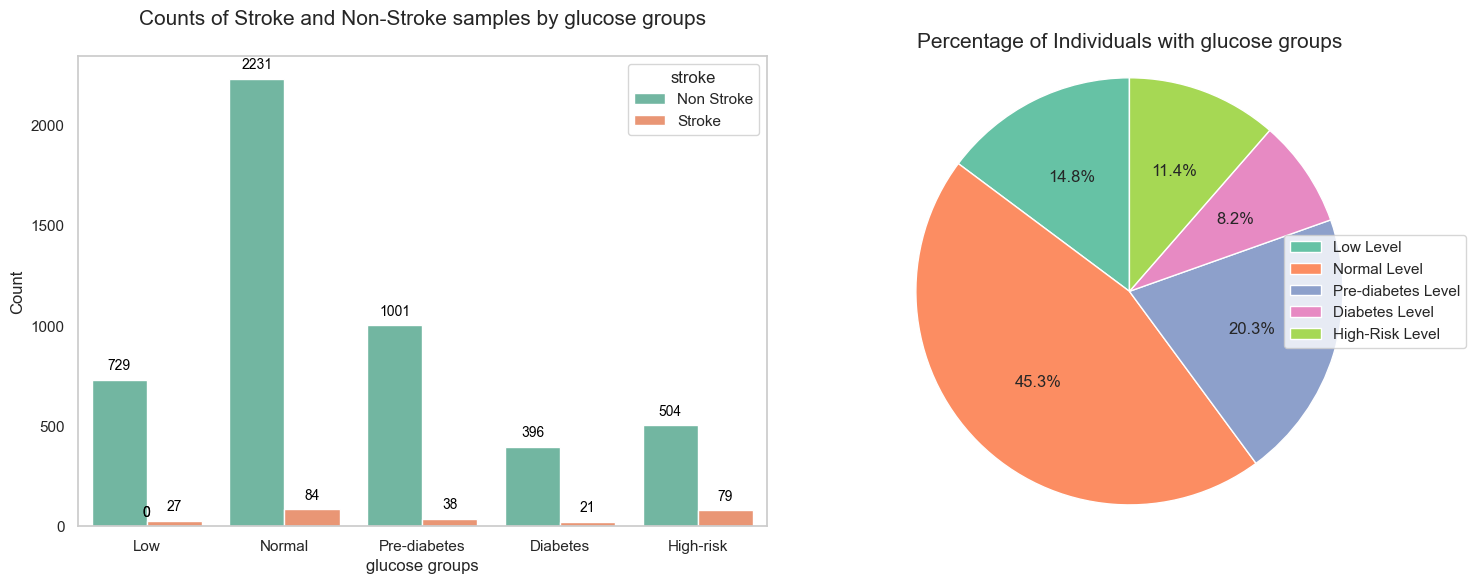

In [578]:
# Group by glucose groups and stroke status, then count occurrences
strokeGLY_count = Data.groupby(["glucose_group", "stroke"], observed = True).size().unstack(fill_value = 0)
GLY_G_count = strokeGLY_count.reset_index()


# Melt the DataFrame for easier plotting with seaborn
meltedGLY_Count = GLY_G_count.melt(id_vars = "glucose_group", value_vars = [0, 1], 
                                     var_name = "stroke", value_name = "count")
meltedGLY_Count["stroke"] = meltedGLY_Count["stroke"].map({0: "Non Stroke", 1: "Stroke"})

# Count occurrences of glucose groups
GLY_counts = Data["glucose_group"].value_counts()

# print(strokeGLY_count)

# Use the actual labels from the BMI Groups column
low_l_count = GLY_counts.get("Low", 0) 
normal_l_count = GLY_counts.get("Normal", 0) 
pre_l_count = GLY_counts.get("Pre-diabetes", 0) 
dia_l_count = GLY_counts.get("Diabetes", 0)
high_l_count = GLY_counts.get("High-risk", 0)

# Prepare data for plotting
Percentage_data = [low_l_count, normal_l_count, pre_l_count, dia_l_count, high_l_count]
labels = ["Low Level", "Normal Level", "Pre-diabetes Level", "Diabetes Level", "High-Risk Level"]

# Create subplots for the bar plot and pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
sns.set(style = "whitegrid")

# Create the bar plot
sns.barplot(data = meltedGLY_Count, x = "glucose_group", y = "count", hue = "stroke", 
            palette = "Set2", ax = ax1)

# Set titles and labels for the bar plot
ax1.set_title("Counts of Stroke and Non-Stroke samples by glucose groups", fontsize = 15, y = 1.05)
ax1.set_xlabel("glucose groups")
ax1.set_ylabel("Count")
ax1.grid(axis="y")

# Annotate counts on the stroke bar plot
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_height())}", 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = "center", va = "bottom", 
                  fontsize = 10, color = "black", 
                  xytext = (0, 5), 
                  textcoords = "offset points")

# Create the pie chart
colors = sns.color_palette("Set2", n_colors = len(labels))
ax2.pie(Percentage_data, colors = colors, autopct = "%1.1f%%", startangle = 90)
ax2.set_title("Percentage of Individuals with glucose groups", fontsize = 15)
ax2.axis("equal")    # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend to the pie chart
ax2.legend(labels = labels, loc = "center right")    # Adjust position as needed

plt.tight_layout()
plt.show()

> ## 4-1-3. Count of Ever maried, Residence type and Work type base on each others

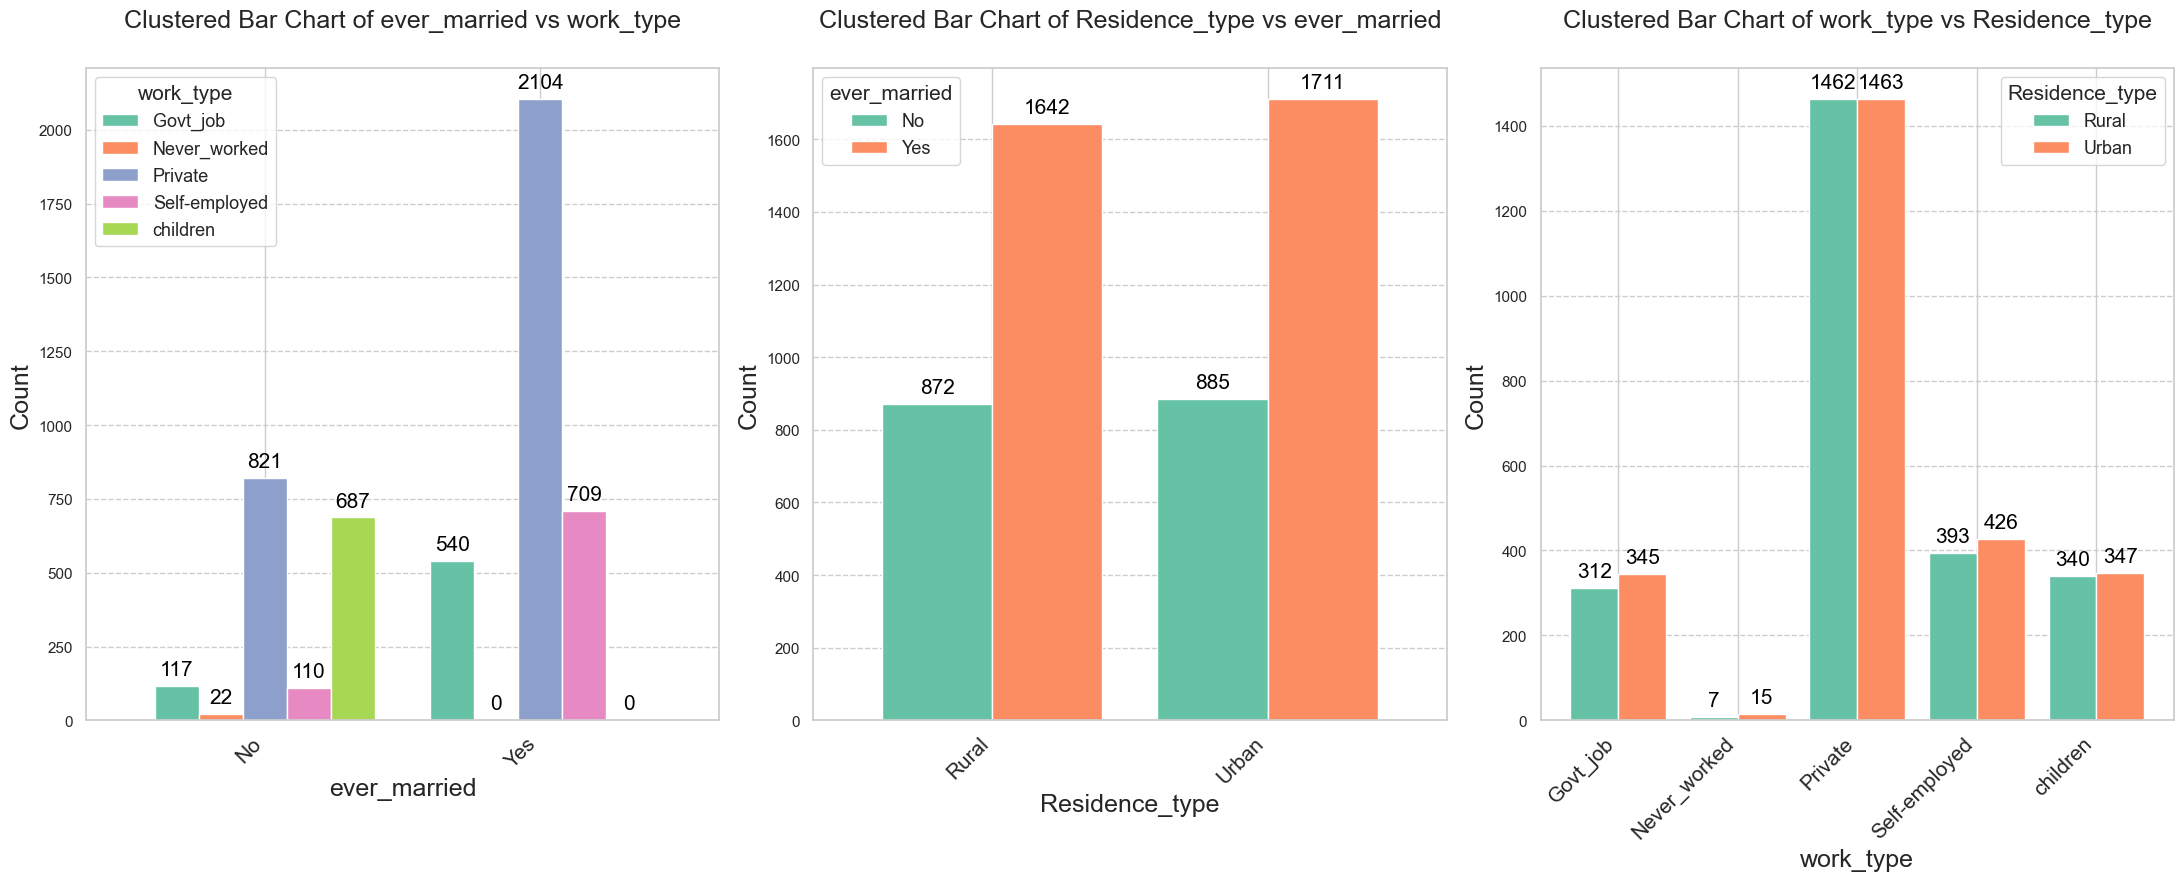

In [579]:
# Set the style for the plots
sns.set(style = "whitegrid")

# Create a figure for the plots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (22, 9))  # 1 row, 3 columns

# Create clustered bar charts for each pair of categorical variables
for i, (col1, col2) in enumerate([("ever_married", "work_type"), 
                                   ("Residence_type", "ever_married"), 
                                   ("work_type", "Residence_type")]):
    # Create a contingency table
    crosstab = pd.crosstab(Data[col1], Data[col2])
    
    # Plot the clustered bar chart
    crosstab.plot(kind = "bar", ax = axes[i], color = sns.color_palette("Set2"), width = 0.8)
    
    # Set titles and labels
    axes[i].set_title(f"Clustered Bar Chart of {col1} vs {col2}", fontsize = 18, y = 1.05)
    axes[i].set_xlabel(col1, fontsize = 18)
    axes[i].set_ylabel("Count", fontsize = 18)
    axes[i].legend(title = col2, title_fontsize = 15, fontsize = 13)
    axes[i].grid(axis = "y", linestyle = "--", alpha = 1)

    # Rotate x-axis tick labels
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 45, ha = "right", fontsize = 15)

    # Annotate counts on the bars
    for p in axes[i].patches:
        axes[i].annotate(f"{int(p.get_height())}", 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = "center", va = "bottom", 
                         fontsize = 15, color = "black", 
                         xytext = (0, 5), 
                         textcoords = "offset points")

# Adjust layout and add space between subplots
plt.subplots_adjust(wspace = 0.3)    # Adjust the width space between subplots

plt.tight_layout()
plt.show()

> ## 4-1-4: Checking normality with Q-Q Plot and Histogram

Checking normality for: age


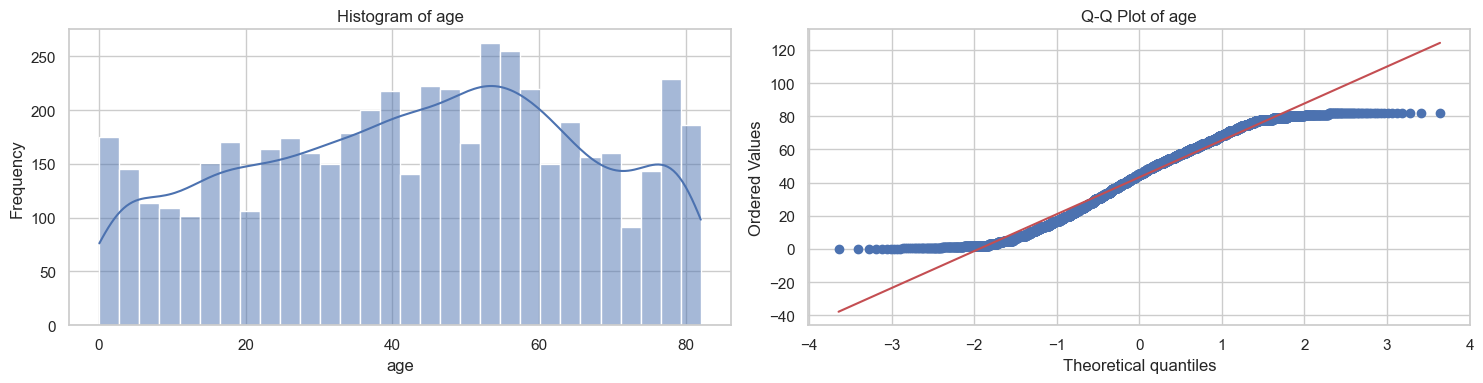

Checking normality for: avg_glucose_level


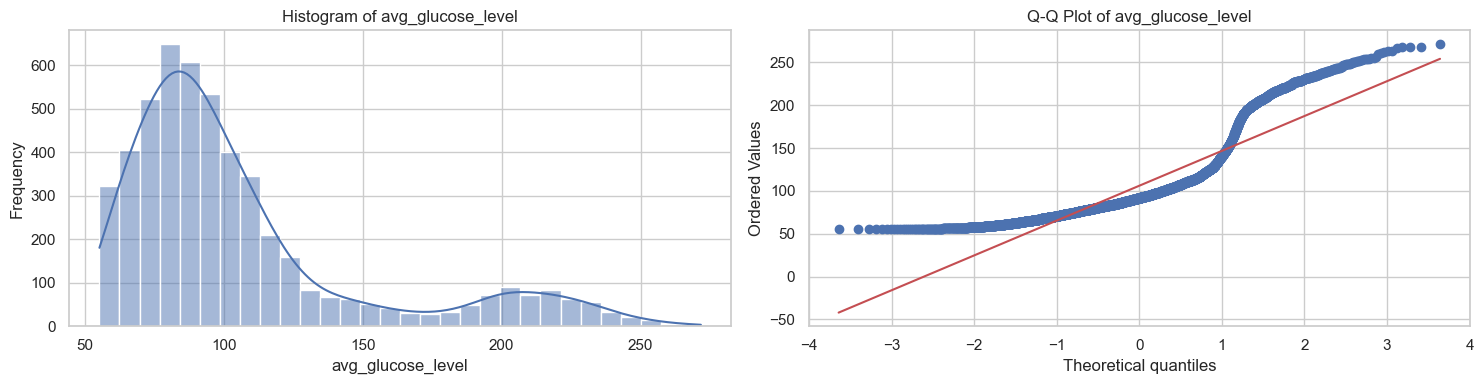

Checking normality for: bmi


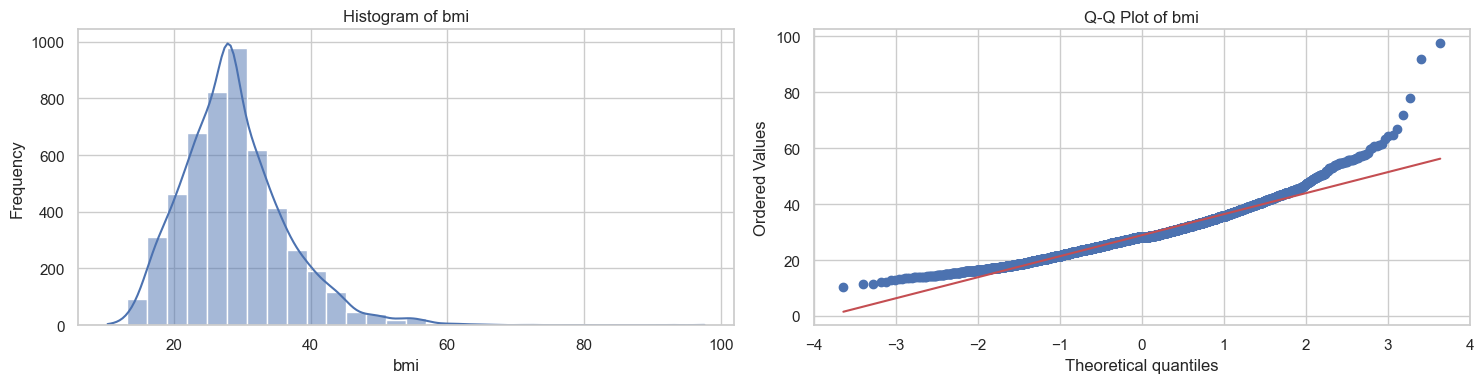

Checking normality for: hypertension


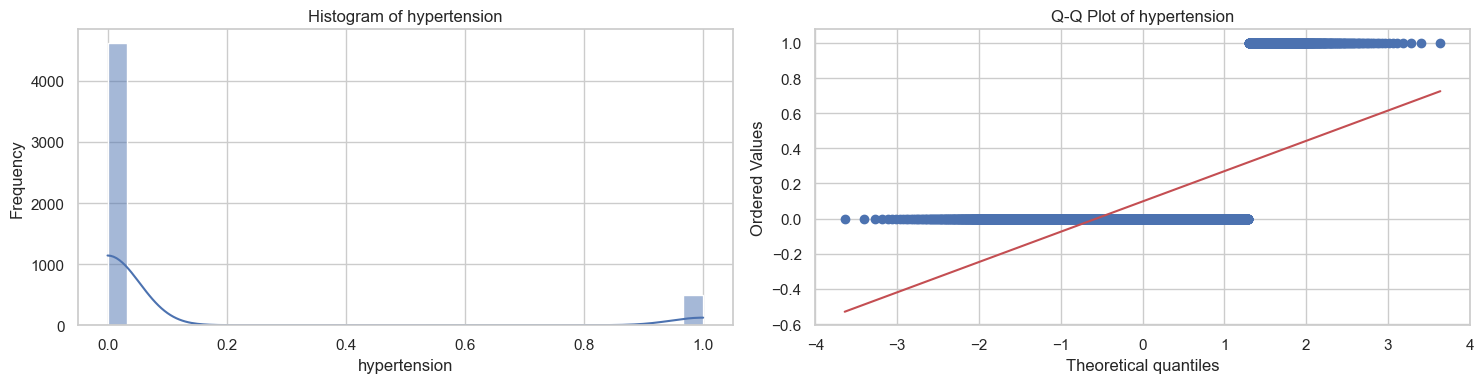

Checking normality for: heart_disease


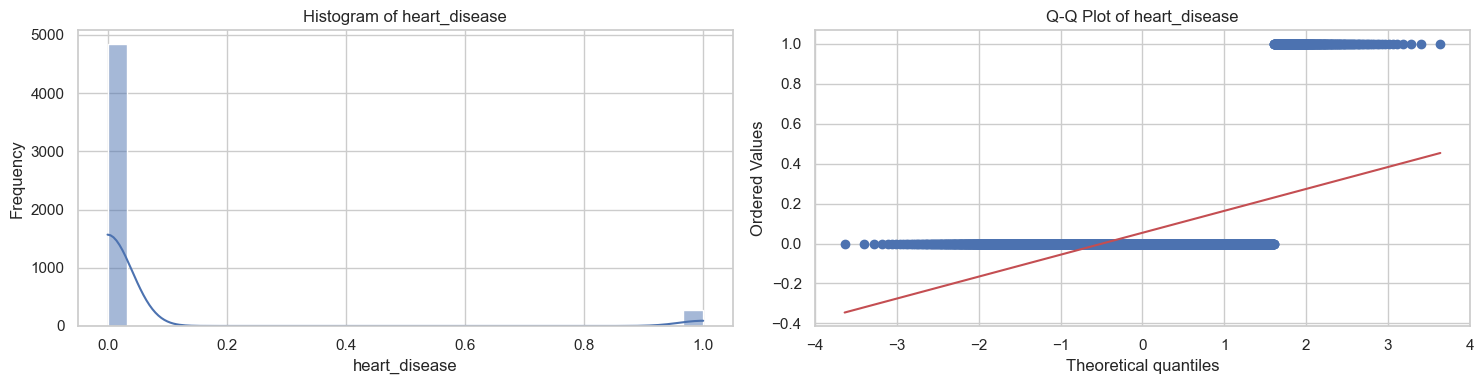

Checking normality for: stroke


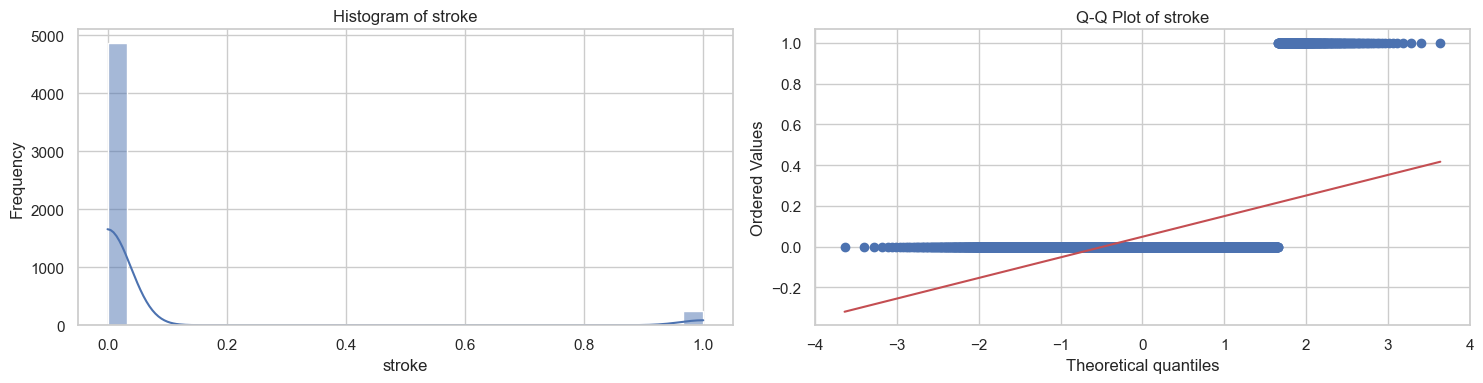

In [580]:
numerical_columns = ["age", "avg_glucose_level", "bmi", "hypertension", "heart_disease", "stroke"]

# Function to perform normality visualizations
def check_normality(columns):
    for column in columns:
        print(f"Checking normality for: {column}")
             
        plt.figure(figsize = (15, 4))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(Data[column], bins = 30, kde = True)
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        
        # Q-Q Plot
        plt.subplot(1, 2, 2)
        stats.probplot(Data[column], dist = "norm", plot = plt)
        plt.title(f"Q-Q Plot of {column}")
        
        plt.tight_layout()
        plt.show()

# Call the function to check normality
check_normality(numerical_columns)

> ## 4-1-5: Checking normality with Shapiro-Wilk, Anderson-Darling and Kolmogorov-Smirnov Test

In [581]:
numerical_columns = ["age", "avg_glucose_level", "bmi", "hypertension", "heart_disease", "stroke"]

# Function to perform normality tests
def check_normality(data, columns):
    for column in columns:
        print(f"\n-Checking normality for: {column}")
        
        # Shapiro-Wilk Test (commented out for large datasets)
        if len(data[column]) <= 5000:
            stat, p = shapiro(data[column])
            print(f"\n1.Shapiro-Wilk Test: Statistic = {stat:.4f}, 1.p-value = {p:.4f}")
            if p > 0.05:
                print("  \n1.Data is normally distributed (Shapiro-Wilk) ✅")
            else:
                print("  \n1.Data is not normally distributed (Shapiro-Wilk) ❌")
        else:
            print("  \n1.Skipping Shapiro-Wilk Test due to large sample size (N > 5000)")


        # Anderson-Darling Test
        result = anderson(data[column], dist = "norm")
        print(f"\n2.Anderson-Darling Test: Statistic = {result.statistic:.4f}")
        for i in range(len(result.critical_values)):
            print(f"  {result.significance_level[i]:.1f}%: {result.critical_values[i]:.4f}")
        if result.statistic < result.critical_values[2]:    # 5% significance level
            print("  Data is normally distributed (Anderson-Darling) ✅")
        else:
            print("  Data is not normally distributed (Anderson-Darling) ❌")
        

        # Kolmogorov-Smirnov Test
        ks_stat, ks_p = kstest(data[column], "norm", args = (data[column].mean(), data[column].std()))
        print(f"\n3.Kolmogorov-Smirnov Test: Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")
        if ks_p > 0.05:
            print("  Data is normally distributed (Kolmogorov-Smirnov) ✅")
        else:
            print("  Data is not normally distributed (Kolmogorov-Smirnov) ❌")

# Call the function to check normality
check_normality(Data, numerical_columns)


-Checking normality for: age
  
1.Skipping Shapiro-Wilk Test due to large sample size (N > 5000)

2.Anderson-Darling Test: Statistic = 33.8564
  15.0%: 0.5760
  10.0%: 0.6550
  5.0%: 0.7860
  2.5%: 0.9170
  1.0%: 1.0910
  Data is not normally distributed (Anderson-Darling) ❌

3.Kolmogorov-Smirnov Test: Statistic = 0.0507, p-value = 0.0000
  Data is not normally distributed (Kolmogorov-Smirnov) ❌

-Checking normality for: avg_glucose_level
  
1.Skipping Shapiro-Wilk Test due to large sample size (N > 5000)

2.Anderson-Darling Test: Statistic = 352.0863
  15.0%: 0.5760
  10.0%: 0.6550
  5.0%: 0.7860
  2.5%: 0.9170
  1.0%: 1.0910
  Data is not normally distributed (Anderson-Darling) ❌

3.Kolmogorov-Smirnov Test: Statistic = 0.1828, p-value = 0.0000
  Data is not normally distributed (Kolmogorov-Smirnov) ❌

-Checking normality for: bmi
  
1.Skipping Shapiro-Wilk Test due to large sample size (N > 5000)

2.Anderson-Darling Test: Statistic = 39.3698
  15.0%: 0.5760
  10.0%: 0.6550
  5.0%: 0

> ## 4-1-6. Plots Analysis
> Results :
> 1) About 95% of samples have not Stroke and 5% have stroke (about 249 samples of 5110 samples).
> 2) Distribution of samples isn"t a Normal distribution.
> 3) About 60% of samples are female(about 2994 female/2115 male )
> 4) About 90% of samples dont have any hypertension.
> 5) About 95% of samples dont have any heart disease.
> 6) About 34% of samples never get married (1757) and 3353 married.
> 7) Most of samples worked in private (2925).
> 8) about 50% have Urban Residence_type and 50% have Rural Residence_type
> 9) We dont have any information in smoking field for 1483 of sapmples.
> 10) In our Data, outlier data are present alot.

> ## 4-2. Analyze the samples that have Stroke

> ## 4-2-1. Create a dataset that contains only ba those who has stroke

In [582]:
Stroke_Data = Data[Data["stroke"] == 1]

> ## 4-2-2. Box Plot of BMI, AVG Glucose Level and Age base on Gender

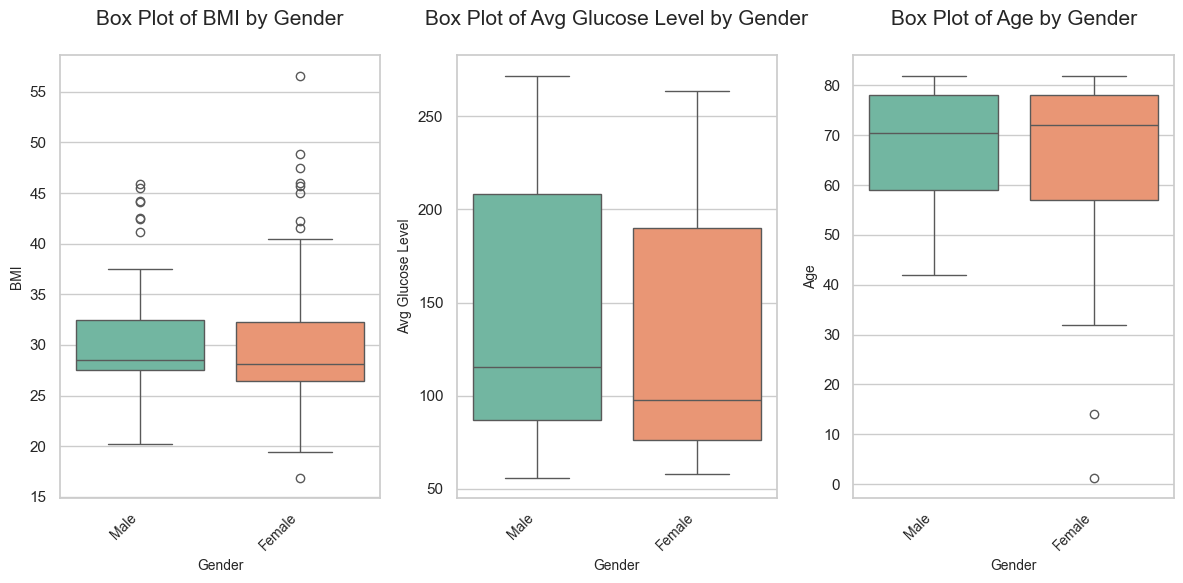

In [583]:
sns.set(style = "whitegrid")

plt.figure(figsize = (12, 6))

# Box Plot for BMI by Gender
plt.subplot(1, 3, 1)
sns.boxplot(x = "gender", y = "bmi", data = Stroke_Data, hue = "gender", palette = "Set2", legend = False)
plt.title("Box Plot of BMI by Gender", fontsize = 15, y = 1.05)
plt.xlabel("Gender", fontsize = 10)
plt.ylabel("BMI", fontsize = 10)
plt.xticks(rotation = 45, ha = "right", fontsize = 10) 

# Box Plot for Avg Glucose Level by Gender
plt.subplot(1, 3, 2)
sns.boxplot(x = "gender", y = "avg_glucose_level", data = Stroke_Data, hue = "gender", palette = "Set2", legend = False)
plt.title("Box Plot of Avg Glucose Level by Gender", fontsize = 15, y = 1.05)
plt.xlabel("Gender", fontsize = 10)
plt.ylabel("Avg Glucose Level", fontsize = 10)
plt.xticks(rotation = 45, ha = "right", fontsize = 10) 

# Box Plot for Age by Gender
plt.subplot(1, 3, 3)
sns.boxplot(x = "gender", y = "age", data = Stroke_Data, hue = "gender", palette = "Set2", legend = False)
plt.title("Box Plot of Age by Gender", fontsize = 15, y = 1.05)
plt.xlabel("Gender", fontsize = 10)
plt.ylabel("Age", fontsize = 10)
plt.xticks(rotation = 45, ha = "right", fontsize = 10) 

plt.tight_layout()
plt.show()

> ## 4-2-3. Count of Ever Maried, Residence type and Work type

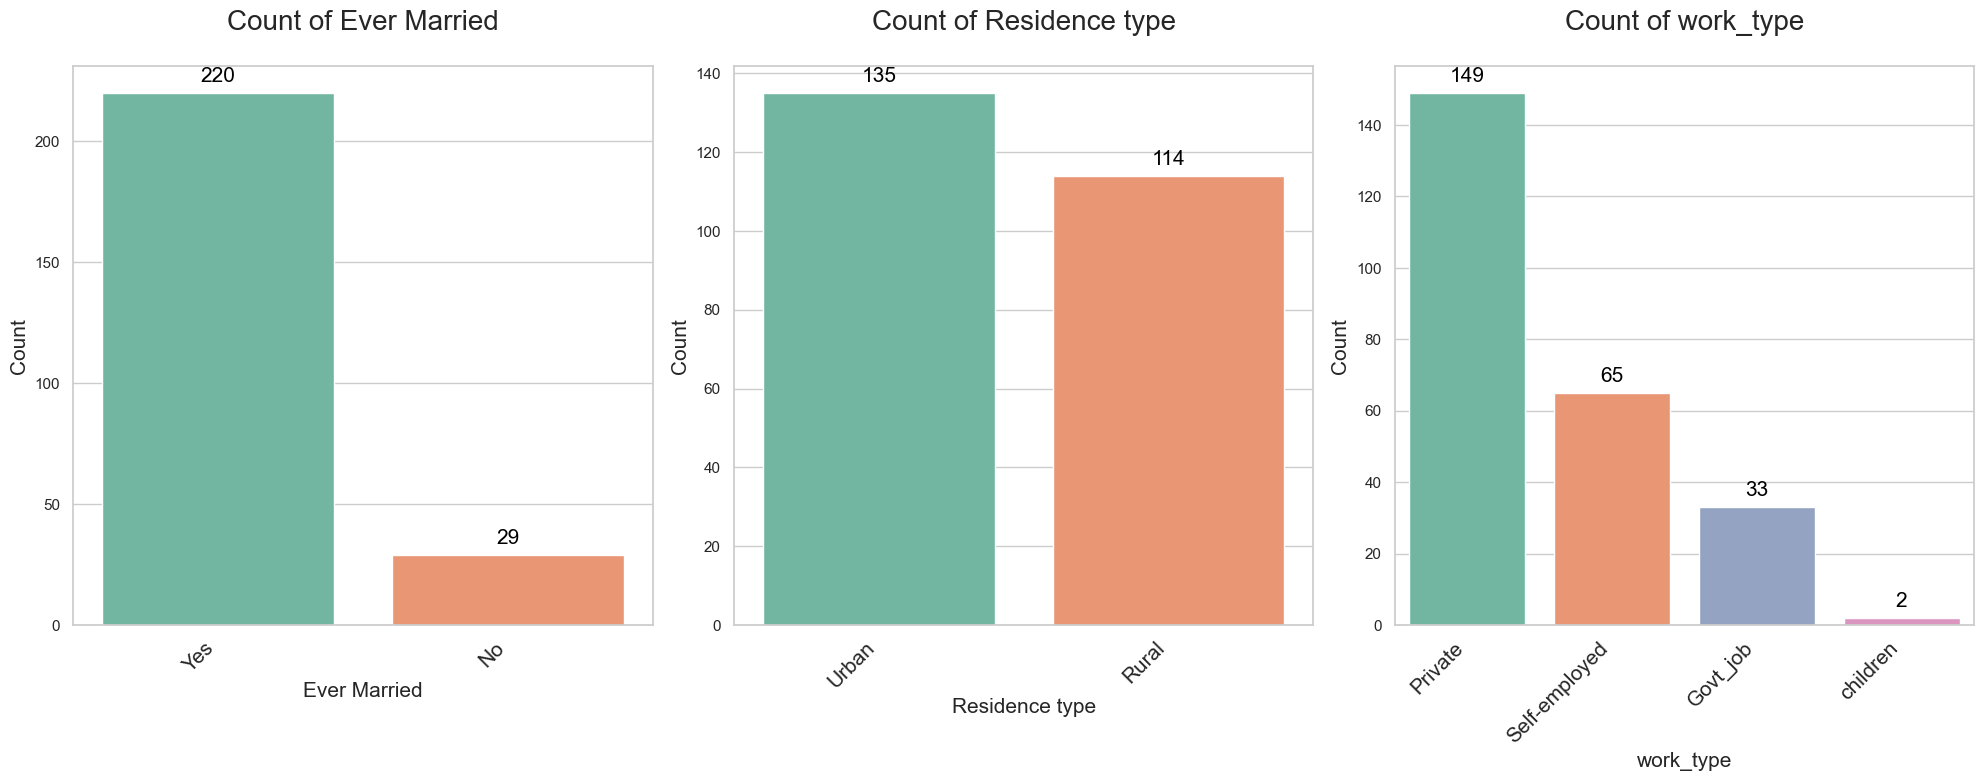

In [584]:
sns.set(style = "whitegrid")

plt.figure(figsize = (20, 8))

# Count Plot for Ever Married
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data = Stroke_Data, x = "ever_married", hue = "ever_married", palette = "Set2", legend = False)
plt.title("Count of Ever Married", fontsize = 20, y = 1.05)
plt.xlabel("Ever Married", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(rotation = 45, ha = "right", fontsize = 15) 

# Annotate counts on the bars for Ever Married
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_height())}", 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = "center", va = "bottom", 
                  fontsize = 15, color = "black", 
                  xytext = (0, 5), 
                  textcoords = "offset points")


# Count Plot for Ever Residence type
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data = Stroke_Data, x = "Residence_type", hue = "Residence_type", palette = "Set2")
plt.title("Count of Residence type", fontsize = 20, y = 1.05)
plt.xlabel("Residence type", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(rotation = 45, ha = "right", fontsize = 15) 

# Annotate counts on the bars for Residence type
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = "center", va = "bottom", 
                  fontsize = 15, color = "black", 
                  xytext = (0, 5), 
                  textcoords = "offset points")
    
# Count Plot for Ever work_type
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data = Stroke_Data, x = "work_type", hue = "work_type", palette = "Set2")
plt.title("Count of work_type", fontsize = 20, y = 1.05)
plt.xlabel("work_type", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(rotation = 45, ha = "right", fontsize = 15) 

# Annotate counts on the bars for Smoking Status
for p in ax3.patches:
    ax3.annotate(f"{int(p.get_height())}", 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = "center", va = "bottom", 
                  fontsize = 15, color = "black", 
                  xytext = (0, 5), 
                  textcoords = "offset points")


plt.tight_layout()
plt.show()

> ## 4-2-4. corrolation and Heat map of Hypertension and Heart disease

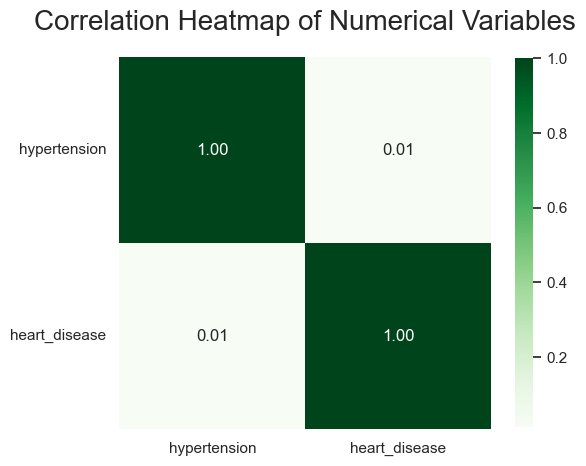

In [585]:
sns.set(style = "whitegrid")

# Calculate the correlation matrix
correlation_matrix = Stroke_Data[["hypertension", "heart_disease"]].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize = (6, 6))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "Greens", square = True, cbar_kws = {"shrink": .8})
plt.title("Correlation Heatmap of Numerical Variables", fontsize = 20, y = 1.05)
plt.yticks(rotation = 0, ha = "right") 

plt.show()

> ## 4-2-5. Scatter plot of BMI and Age base on AVG Glucose Level

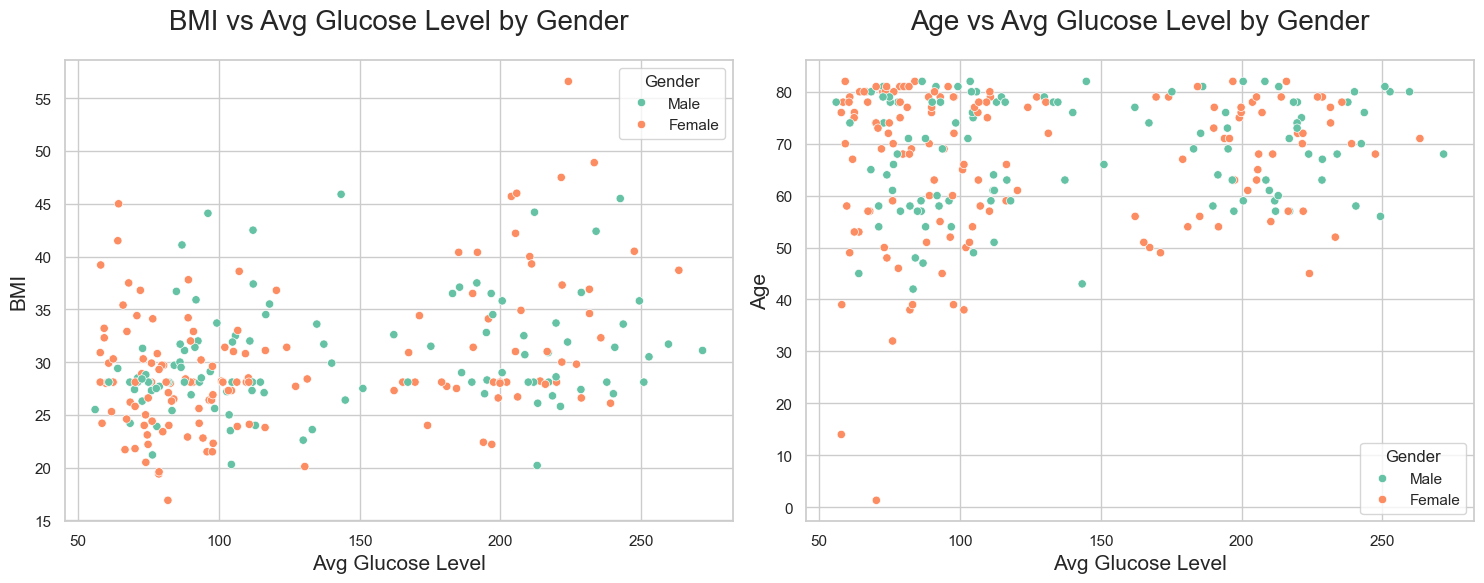

In [586]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

sns.set(style = "whitegrid")

# Create the first scatter plot for BMI vs Avg Glucose Level
sns.scatterplot(data = Stroke_Data, x = "avg_glucose_level", y = "bmi", hue = "gender", palette = "Set2", ax = ax1)
ax1.set_title("BMI vs Avg Glucose Level by Gender", fontsize = 20, y = 1.05)
ax1.set_xlabel("Avg Glucose Level", fontsize = 15)
ax1.set_ylabel("BMI", fontsize = 15)
ax1.legend(title = "Gender")

# Create the second scatter plot for Age vs Avg Glucose Level
sns.scatterplot(data = Stroke_Data, x = "avg_glucose_level", y = "age", hue = "gender", palette = "Set2", ax = ax2)
ax2.set_title("Age vs Avg Glucose Level by Gender", fontsize = 20, y = 1.05)
ax2.set_xlabel("Avg Glucose Level", fontsize = 15)
ax2.set_ylabel("Age", fontsize = 15)
ax2.legend(title = "Gender")

plt.tight_layout()
plt.show()

> ## 4-2-6. Bar plot of Smoking status and AVG Glucose Level base on Gender

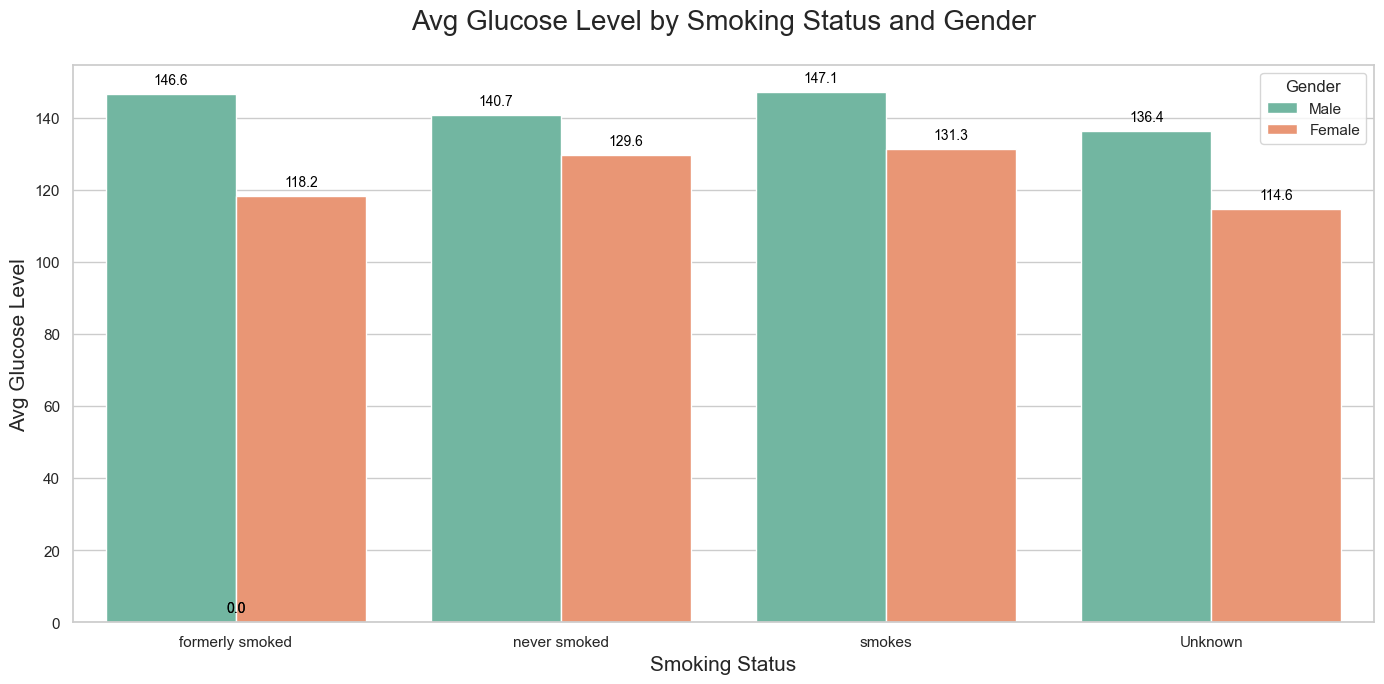

In [587]:
sns.set(style = "whitegrid")

# Create a grouped bar chart for Avg Glucose Level by Smoking Status and Gender
plt.figure(figsize = (14, 7))
ax = sns.barplot(data = Stroke_Data, x = "smoking_status", y = "avg_glucose_level", hue = "gender", errorbar = None, palette = "Set2")

# Annotate counts on the bars for Avg Glucose Level
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = "center", va = "bottom", 
                fontsize = 10, color = "black", 
                xytext = (0, 5), 
                textcoords = "offset points")

plt.title("Avg Glucose Level by Smoking Status and Gender", fontsize = 20, y = 1.05)
plt.xlabel("Smoking Status", fontsize = 15)
plt.ylabel("Avg Glucose Level", fontsize = 15)
plt.legend(title = "Gender")

plt.tight_layout() 
plt.show()

> ## 4-2-7. Count of Ever married base on Hypertension

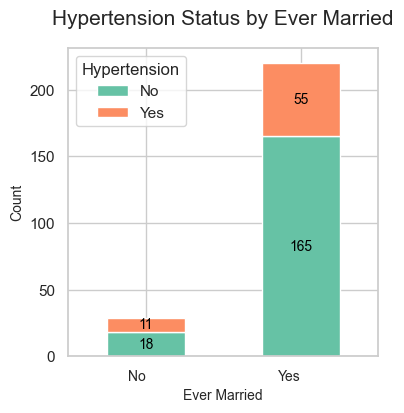

In [588]:
sns.set(style = "whitegrid")
colors = sns.color_palette("Set2", n_colors = 2) 

# Stacked Bar Chart for Hypertension by Ever Married
hypertension_counts = Stroke_Data.groupby(["ever_married", "hypertension"]).size().unstack(fill_value = 0)
ax = hypertension_counts.plot(kind = "bar", stacked = True, figsize = (4, 4), color = colors)

# Annotate counts on the bars
for p in ax.patches:
    
    height = p.get_height()   # Get the height of the current bar segment
    x = p.get_x() + p.get_width() / 2   # Get the x position of the current bar segment
    
    # Calculate the y position for the annotation
    # Place it in the center of the segment: height / 2
    y = p.get_y() + height / 2 

    ax.annotate(f"{height:.0f}", 
                (x, y), 
                ha = "center", va = "center",  # Center the text
                fontsize = 10, color = "black", 
                xytext = (0, 0),  # No offset
                textcoords = "offset points")

plt.title("Hypertension Status by Ever Married", fontsize = 15, y = 1.05)
plt.xlabel("Ever Married", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.legend(title = "Hypertension", labels = ["No", "Yes"])
plt.xticks(rotation = 0, ha = "right", fontsize = 10)

plt.show()

> ## 4-2-8. Heat map of Hypertension and Heart disease

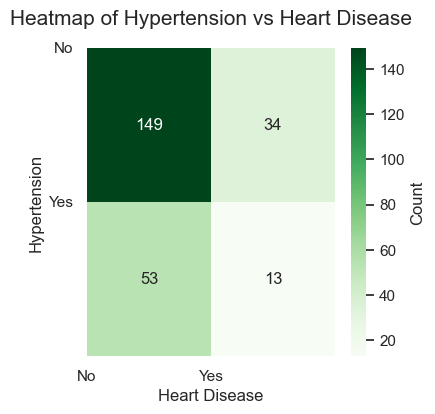

In [589]:
sns.set(style = "whitegrid")

# Create a contingency table for hypertension and heart disease
contingency_table = pd.crosstab(Stroke_Data["hypertension"], Stroke_Data["heart_disease"])

# Create a heatmap
plt.figure(figsize = (4, 4))
sns.heatmap(contingency_table, annot = True, fmt = "d", cmap = "Greens", cbar_kws = {"label": "Count"})
plt.title("Heatmap of Hypertension vs Heart Disease", fontsize = 15, y = 1.05)
plt.xlabel("Heart Disease")
plt.ylabel("Hypertension")
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"], rotation = 0, ha = "right")

plt.show()

> ## 4-2-9. Plots Analysis
> Results :
> 1) Distribution of samples isn"t a Normal distribution.
> 2) The range of :
> age is between 1 to 82 - BMI is between 16.9 to 56.6 - Glocuse Level between 56.11 to 271.74
> 3) About 57% of samples are female(about 141 female/108 male )
> 4) About 73% of samples dont have any hypertension (183) and 66 have hyper.
> 5) About 81% of samples dont have any heart disease (202) and 47 have heart disease.
> 6) About 12% of samples never get married (29) and 220 married.
> 7) about 60% Most of samples worked in private (149).
> 8) about 54% have Urban Residence_type (135) and 46% have Rural Residence_type (114)
> 9) We dont have any information in smoking field for 47 of sapmples (19%).
> 10) In Glucose Groups, 34% have normal, 32% have high-risk, 15% have pre diabete and 8% have diabete status.
> 11) In BMI Groups, Over weight has 46%, Obesity weight has 39%, Normal weight has 15% and Under weight hase 0.5%.

> # 5. Preparation 

In [590]:
Data.dtypes

gender                 object
age                   float64
hypertension            int64
heart_disease           int64
avg_glucose_level     float64
bmi                   float64
smoking_status         object
ever_married           object
work_type              object
Residence_type         object
stroke                  int64
age_group            category
glucose_group        category
bmi_group            category
dtype: object

> ## 5-1. Convert category and object variables

In [591]:
columns_temp = ["gender", "ever_married", "work_type", "smoking_status", "Residence_type", 
                "bmi_group", "glucose_group", "age_group"]

LE = LabelEncoder()

# Encode categorical columns
for col in columns_temp:
    print("Column - ", col)
    value_counts = Data[col].value_counts()   # Display formatted value counts
    for idx, (value, count) in enumerate(value_counts.items()):
        print(f"{idx}- {value}: {count}")
    
    Data[col] = LE.fit_transform(Data[col])
    print("\nValue counts after encoding:")
    print(Data[col].value_counts())     # Display the value counts after encoding
    print("_" * 45)

Column -  gender
0- Female: 2994
1- Male: 2116

Value counts after encoding:
gender
0    2994
1    2116
Name: count, dtype: int64
_____________________________________________
Column -  ever_married
0- Yes: 3353
1- No: 1757

Value counts after encoding:
ever_married
1    3353
0    1757
Name: count, dtype: int64
_____________________________________________
Column -  work_type
0- Private: 2925
1- Self-employed: 819
2- children: 687
3- Govt_job: 657
4- Never_worked: 22

Value counts after encoding:
work_type
2    2925
3     819
4     687
0     657
1      22
Name: count, dtype: int64
_____________________________________________
Column -  smoking_status
0- never smoked: 1892
1- Unknown: 1544
2- formerly smoked: 885
3- smokes: 789

Value counts after encoding:
smoking_status
2    1892
0    1544
1     885
3     789
Name: count, dtype: int64
_____________________________________________
Column -  Residence_type
0- Urban: 2596
1- Rural: 2514

Value counts after encoding:
Residence_type
1    2

> ## 5-2. Spliting

In [712]:
X = Data.drop(columns = ["stroke"])  # Feature variables
y = Data["stroke"]                   # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42, stratify = y)

> # 6. Machine Learning
> ### To decrease effect of larg values, we normalize data
> ### First, we choose RobustScaler() to normalize the data, because outlier data are present alot.
> ### Second, we choose MinMaxScaler() to normalize the data to see if we can take better Scores

In [713]:
scaler_normal = RobustScaler()

X_train1 = scaler_normal.fit_transform(X_train)
X_test1 = scaler_normal.transform(X_test)

scaler_normal = MinMaxScaler()
X_train2 = scaler_normal.fit_transform(X_train)
X_test2 = scaler_normal.fit_transform(X_test)

> ## 6-1-1. ML Models for RobustScaler()

> ### 1. Logistic Regression

In [714]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 30000, random_state = 42)

LR.fit(X_train1, y_train)

y_pred_LR = LR.predict(X_test1)
acc_LR = accuracy_score(y_test, y_pred_LR)

print(classification_report(y_test, y_pred_LR, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_LR * 100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Accuracy Score is : 95.01%


> ### 2. Support Vector Machine (SVM) 

In [715]:
from sklearn.svm import SVC

SVM = SVC(max_iter = 20000, random_state = 42, probability = True, 
          kernel="linear")  # Kernel = 'linear', 'rbf', 'poly', 'precomputed', 'sigmoid'

SVM.fit(X_train1, y_train)

y_pred_SVM = SVM.predict(X_test1)
acc_SVM = accuracy_score(y_test, y_pred_SVM)

print(classification_report(y_test, y_pred_SVM, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_SVM * 100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Accuracy Score is : 95.11%


> ### 3. KNeighbors Classifier (KNN)

In [716]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train1, y_train)

y_pred_KNN = KNN.predict(X_test1)
acc_KNN = accuracy_score(y_test, y_pred_KNN)

print(classification_report(y_test, y_pred_KNN, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_KNN * 100))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.17      0.04      0.06        50

    accuracy                           0.94      1022
   macro avg       0.56      0.51      0.52      1022
weighted avg       0.91      0.94      0.93      1022

Accuracy Score is : 94.32%


> ### 4. Gradient Boosting Classifier (GBM)

In [717]:
from sklearn.ensemble import GradientBoostingClassifier

GBM = GradientBoostingClassifier(random_state = 42)

GBM.fit(X_train1, y_train)

y_pred_GBM = GBM.predict(X_test1)
acc_GBM = accuracy_score(y_test, y_pred_GBM)

print(classification_report(y_test, y_pred_GBM, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_GBM * 100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.25      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.60      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022

Accuracy Score is : 94.91%


> ### 5. Random Forest Classifier

In [718]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth = 20000 , random_state = 42)

RF.fit(X_train1, y_train)

y_pred_RF = RF.predict(X_test1)
acc_RF = accuracy_score(y_test, y_pred_RF)

print(classification_report(y_test, y_pred_RF, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_RF * 100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Accuracy Score is : 94.91%


> ### 6. Neural Networks (Multi-Layer Perceptron)

In [719]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(max_iter = 20000,random_state = 42)

MLP.fit(X_train1, y_train)

y_pred_MLP = MLP.predict(X_test1)
acc_MLP = accuracy_score(y_test, y_pred_MLP)

print(classification_report(y_test, y_pred_MLP, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_MLP * 100))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       972
           1       0.12      0.06      0.08        50

    accuracy                           0.93      1022
   macro avg       0.54      0.52      0.52      1022
weighted avg       0.91      0.93      0.92      1022

Accuracy Score is : 93.25%


> ### 7. Decision Tree Classifier

In [720]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state = 42)

DT.fit(X_train1, y_train)

y_pred_DT = DT.predict(X_test1)
acc_DT = accuracy_score(y_test, y_pred_DT)

print(classification_report(y_test, y_pred_DT, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_DT * 100))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.23      0.24      0.23        50

    accuracy                           0.92      1022
   macro avg       0.59      0.60      0.60      1022
weighted avg       0.92      0.92      0.92      1022

Accuracy Score is : 92.27%


> ### 8. Extra Trees Classifier

In [721]:
from sklearn.ensemble import ExtraTreesClassifier

ET = ExtraTreesClassifier(max_depth = 2000, random_state = 24)

ET.fit(X_train1, y_train)

y_pred_ET = ET.predict(X_test1)
acc_ET = accuracy_score(y_test, y_pred_ET)

print(classification_report(y_test, y_pred_ET, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_ET * 100))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.94      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.94      0.92      1022

Accuracy Score is : 94.23%


> ## 6-1-2. Confusion Matrix for all models

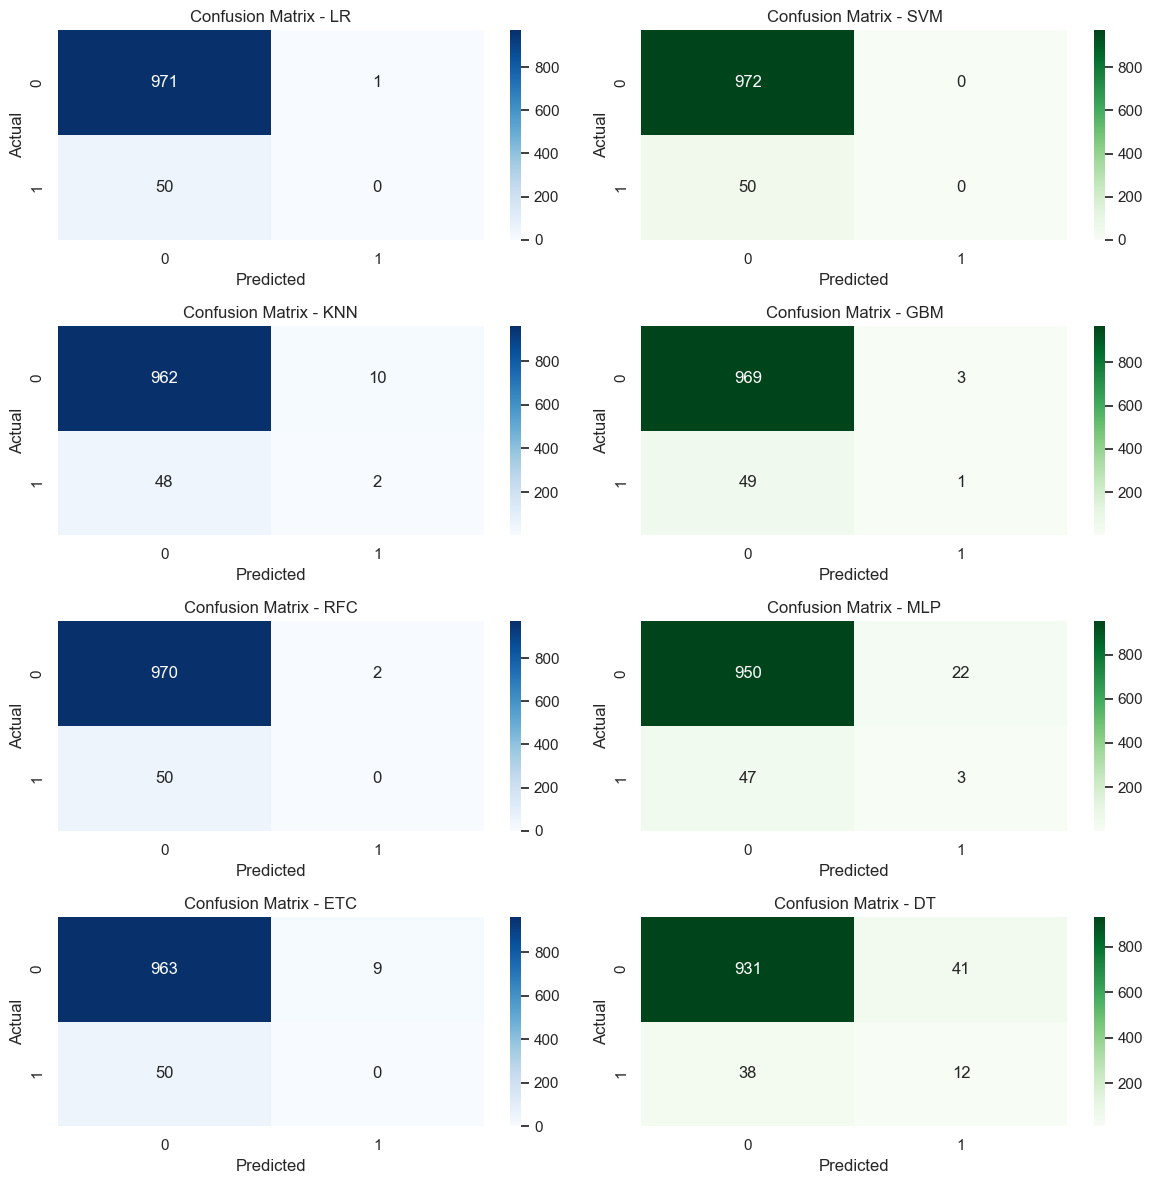

In [722]:
fig, axes = plt.subplots(4, 2, figsize = (12, 12))  # 4 rows, 2 columns

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot = True, fmt = "d", cmap = "Blues", ax = axes[0, 0])
axes[0, 0].set_title("Confusion Matrix - LR")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

# Confusion Matrix for SVM
sns.heatmap(confusion_matrix(y_test, y_pred_SVM), annot = True, fmt = "d", cmap = "Greens", ax = axes[0, 1])
axes[0, 1].set_title("Confusion Matrix - SVM")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

# Confusion Matrix for KNN
sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot = True, fmt = "d", cmap = "Blues", ax = axes[1, 0])
axes[1, 0].set_title("Confusion Matrix - KNN")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")

# Confusion Matrix for GBM
sns.heatmap(confusion_matrix(y_test, y_pred_GBM), annot = True, fmt = "d", cmap = "Greens", ax = axes[1, 1])
axes[1, 1].set_title("Confusion Matrix - GBM")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

# Confusion Matrix for RF
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot = True, fmt = "d", cmap = "Blues", ax = axes[2, 0])
axes[2, 0].set_title("Confusion Matrix - RFC")
axes[2, 0].set_xlabel("Predicted")
axes[2, 0].set_ylabel("Actual")

# Confusion Matrix for MLP
sns.heatmap(confusion_matrix(y_test, y_pred_MLP), annot = True, fmt = "d", cmap = "Greens", ax = axes[2, 1])
axes[2, 1].set_title("Confusion Matrix - MLP")
axes[2, 1].set_xlabel("Predicted")
axes[2, 1].set_ylabel("Actual")

# Confusion Matrix for ET
sns.heatmap(confusion_matrix(y_test, y_pred_ET), annot = True, fmt = "d", cmap = "Blues", ax = axes[3, 0])
axes[3, 0].set_title("Confusion Matrix - ETC")
axes[3, 0].set_xlabel("Predicted")
axes[3, 0].set_ylabel("Actual")

# Confusion Matrix for DT
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot = True, fmt = "d", cmap = "Greens", ax = axes[3, 1])
axes[3,1].set_title("Confusion Matrix - DT")
axes[3,1].set_xlabel("Predicted")
axes[3,1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

> ## 6-2-1. ML Models for MinMaxScaler()

> ### 1. Logistic Regression

In [723]:
LR = LogisticRegression(max_iter = 30000, random_state = 42)

LR.fit(X_train2, y_train)

y_pred_LR = LR.predict(X_test2)
acc_LR = accuracy_score(y_test, y_pred_LR)

print(classification_report(y_test, y_pred_LR, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_LR * 100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Accuracy Score is : 95.11%


> ### 2. Support Vector Machine (SVM) 

In [724]:
SVM = SVC(max_iter = 20000, random_state = 42, probability = True, 
          kernel="linear")  # Kernel = 'linear', 'rbf', 'poly', 'precomputed', 'sigmoid'

SVM.fit(X_train2, y_train)

y_pred_SVM = SVM.predict(X_test2)
acc_SVM = accuracy_score(y_test, y_pred_SVM)

print(classification_report(y_test, y_pred_SVM, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_SVM * 100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Accuracy Score is : 95.11%


> ### 3. KNeighbors Classifier (KNN)

In [725]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train2, y_train)

y_pred_KNN = KNN.predict(X_test2)
acc_KNN = accuracy_score(y_test, y_pred_KNN)

print(classification_report(y_test, y_pred_KNN, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_KNN * 100))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.14      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.55      0.51      0.50      1022
weighted avg       0.91      0.95      0.93      1022

Accuracy Score is : 94.62%


> ### 4. Gradient Boosting Classifier (GBM)

In [726]:
GBM = GradientBoostingClassifier(random_state = 42)

GBM.fit(X_train2, y_train)

y_pred_GBM = GBM.predict(X_test2)
acc_GBM = accuracy_score(y_test, y_pred_GBM)

print(classification_report(y_test, y_pred_GBM, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_GBM * 100))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.29      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.62      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022

Accuracy Score is : 94.81%


> ### 5. Random Forest Classifier

In [727]:
RF = RandomForestClassifier(max_depth = 20000 , random_state = 42)

RF.fit(X_train2, y_train)

y_pred_RF = RF.predict(X_test2)
acc_RF = accuracy_score(y_test, y_pred_RF)

print(classification_report(y_test, y_pred_RF, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_RF * 100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Accuracy Score is : 95.01%


> ### 6. Neural Networks (Multi-Layer Perceptron)

In [728]:
MLP = MLPClassifier(max_iter = 20000,random_state = 42)

MLP.fit(X_train2, y_train)

y_pred_MLP = MLP.predict(X_test2)
acc_MLP = accuracy_score(y_test, y_pred_MLP)

print(classification_report(y_test, y_pred_MLP, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_MLP * 100))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.17      0.04      0.06        50

    accuracy                           0.94      1022
   macro avg       0.56      0.51      0.52      1022
weighted avg       0.91      0.94      0.93      1022

Accuracy Score is : 94.32%


> ### 7. Decision Tree Classifier

In [729]:
DT = DecisionTreeClassifier(random_state = 42)

DT.fit(X_train2, y_train)

y_pred_DT = DT.predict(X_test2)
acc_DT = accuracy_score(y_test, y_pred_DT)

print(classification_report(y_test, y_pred_DT, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_DT * 100))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.16      0.28      0.20        50

    accuracy                           0.89      1022
   macro avg       0.56      0.60      0.57      1022
weighted avg       0.92      0.89      0.91      1022

Accuracy Score is : 89.33%


> ### 8. Extra Trees Classifier

In [730]:
ET = ExtraTreesClassifier(max_depth = 2000, random_state = 24)

ET.fit(X_train2, y_train)

y_pred_ET = ET.predict(X_test2)
acc_ET = accuracy_score(y_test, y_pred_ET)

print(classification_report(y_test, y_pred_ET, zero_division = 0))
print("Accuracy Score is : {:.2f}%".format(acc_ET * 100))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Accuracy Score is : 94.81%


> ## 6-2-2. Confusion Matrix for all models

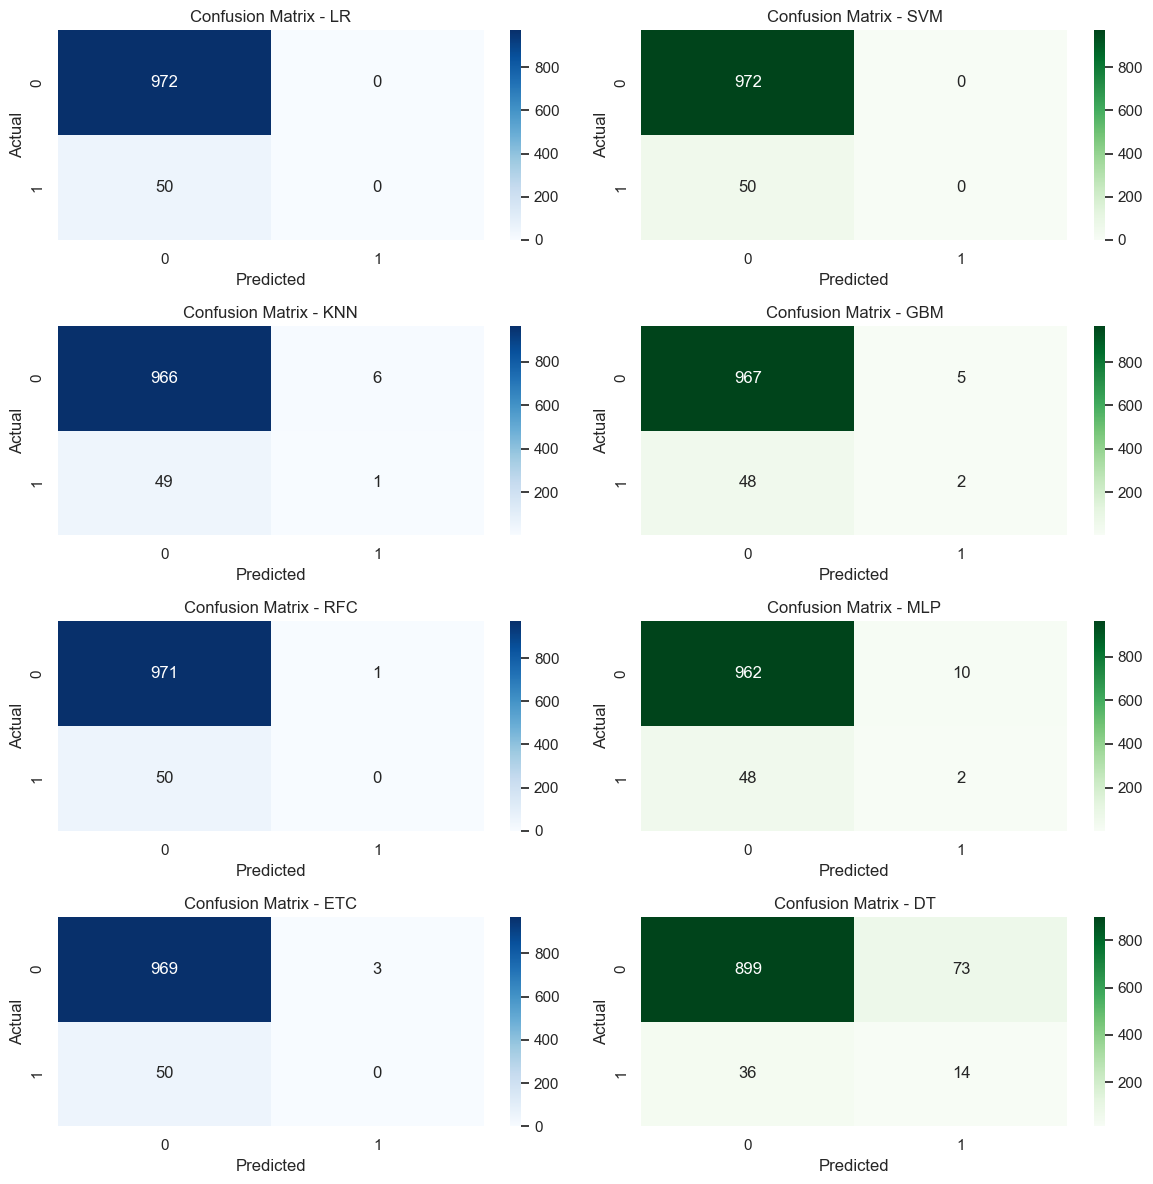

In [731]:
fig, axes = plt.subplots(4, 2, figsize = (12, 12))  # 4 rows, 2 columns

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot = True, fmt = "d", cmap = "Blues", ax = axes[0, 0])
axes[0, 0].set_title("Confusion Matrix - LR")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

# Confusion Matrix for SVM
sns.heatmap(confusion_matrix(y_test, y_pred_SVM), annot = True, fmt = "d", cmap = "Greens", ax = axes[0, 1])
axes[0, 1].set_title("Confusion Matrix - SVM")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

# Confusion Matrix for KNN
sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot = True, fmt = "d", cmap = "Blues", ax = axes[1, 0])
axes[1, 0].set_title("Confusion Matrix - KNN")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")

# Confusion Matrix for GBM
sns.heatmap(confusion_matrix(y_test, y_pred_GBM), annot = True, fmt = "d", cmap = "Greens", ax = axes[1, 1])
axes[1, 1].set_title("Confusion Matrix - GBM")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

# Confusion Matrix for RF
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot = True, fmt = "d", cmap = "Blues", ax = axes[2, 0])
axes[2, 0].set_title("Confusion Matrix - RFC")
axes[2, 0].set_xlabel("Predicted")
axes[2, 0].set_ylabel("Actual")

# Confusion Matrix for MLP
sns.heatmap(confusion_matrix(y_test, y_pred_MLP), annot = True, fmt = "d", cmap = "Greens", ax = axes[2, 1])
axes[2, 1].set_title("Confusion Matrix - MLP")
axes[2, 1].set_xlabel("Predicted")
axes[2, 1].set_ylabel("Actual")

# Confusion Matrix for ET
sns.heatmap(confusion_matrix(y_test, y_pred_ET), annot = True, fmt = "d", cmap = "Blues", ax = axes[3, 0])
axes[3, 0].set_title("Confusion Matrix - ETC")
axes[3, 0].set_xlabel("Predicted")
axes[3, 0].set_ylabel("Actual")

# Confusion Matrix for DT
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot = True, fmt = "d", cmap = "Greens", ax = axes[3, 1])
axes[3,1].set_title("Confusion Matrix - DT")
axes[3,1].set_xlabel("Predicted")
axes[3,1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

> ## Conculusion
>
> ### As can be seen, in the first case(Robust Scaler mode), the Support Vector Machine(SVM) Model, has a higher percentage of prediction(Accuracy Score). In the second case (MinMax Scaler mode), both the Support Vector Machine(SVM) and Logistic Regression(LR) models have a higher percentage of prediction. According to precision, recall, f1-score, support and accuracy scores, the Support Vector Machine(SVM) model is the better model for stroke prediction due to its higher percentage of prediction in both cases.